# Versión C – Predicción de Diabetes

## Instrucciones para Examen

**Objetivo**

Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

Diccionario de Datos:
- Pregnancies: Número de embarazos.
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- BloodPressure: Presión arterial diastólica (mm Hg).
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
- Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
- BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
- DiabetesPedigreeFunction: Función de pedigrí de diabetes.
- Age: Edad (años).
- Outcome: Variable objetivo (1: diabetes, 0: no diabetes).

**Requisitos**

Limpieza de Datos:
- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

Exploración de Datos:
- Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

Implementación de Modelos:
- Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
- Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

**Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:
- Proceso completo de limpieza y preprocesamiento de datos.
- Visualizaciones y estadísticas descriptivas.
- Implementación y evaluación de los modelos de clasificación.
- Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

**Consideraciones Éticas y Tecnológicas**

Consideraciones Éticas:
- Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
- Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

Consideraciones Tecnológicas:
- Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
- Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
- Optimización de Modelos: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.


## **Configuración**

In [1]:
#!pip install --upgrade ipywidgets
#!pip install --upgrade jupyter
#!jupyter nbextension install --py widgetsnbextension
#!jupyter nbextension enable --py widgetsnbextension
import kaggle
# Use the Kaggle API to search for datasets kaggle.api.dataset_list()
import kagglehub
# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)
# Importar las librerías necesarias
import os
import pandas as pd
import numpy as np
from datetime import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway,pearsonr
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression,chi2
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_absolute_error, r2_score,mean_squared_error,roc_curve, auc
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor

Path to dataset files: /Users/iairlinker/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [2]:
# Replace 'diabetes.csv' with the actual file name
dataset_path = os.path.join(path, "diabetes.csv")
df = pd.read_csv(dataset_path)
# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **1. Limpieza de Datos:**

### Manejo de valores faltantes adecuadamente

In [4]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


### Identificación y eliminación de valores duplicados

In [5]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### Verificación y ajuste de tipos de datos

No se requiere, pues todos vienen ya convertidos a los tipos correctos

### **Corrección de inconsistencias en valores categóricos**

#### Rangos para Glucosa, Insulina, Presión Arterial y Espesor del Pliegue Cutáneo según condición médica


---

| **Parámetro**               | **Persona normal**                     | **Diabetes tipo 1**                     | **Diabetes tipo 2**                     |
|-----------------------------|-----------------------------------------|-----------------------------------------|-----------------------------------------|
| **Glucosa postprandial**     | 70-140 mg/dL                            | 180-300 mg/dL                           | 180-250 mg/dL                           |
| **Presión arterial**	       | 70-120/50-80 mmHg	                     | 70-130/50-80 mmHg	                   | 70-130/50-80 mmHg                       |
| **Insulina en sangre**       | 5-25 mU/mL                              | Muy bajos o indetectables               | Elevados o normales                     |
| **Espesor pliegue cutáneo**  | 5-20 mm                                 | 5-15 mm                                 | 20-40 mm                                |

La glucosa postprandial es la medición de los niveles de azúcar en la sangre después de comer. Se realiza mediante un análisis de sangre que se toma dos horas después de ingerir una comida.


| **Variable**       | **Rango normal ampliado** | **Valores fuera de rango** | **Posibles razones (diabéticas o no)**                                                                 |
|---------------------|---------------------------|----------------------------|--------------------------------------------------------------------------------------------------------|
| **Glucosa**         | 60-300 mg/dL              | < 60 o > 300               | Bajos: Hipoglucemia (diabetes). Altos: Diabetes, estrés, infección.                                    |
| **Insulina**        | 3-140 mU/mL               | < 3 o > 30                 | Bajos: Resistencia a la insulina (diabetes tipo 2). Altos: Hipoglucemia reactiva (diabetes tipo 1).    |
| **Presión Arterial**| 50-100 mmHg               | < 50 o > 100               | Bajos: Hipotensión (no relacionada con diabetes). Altos: Hipertensión (común en diabetes).            |
| **Espesor Pliegue Cutáneo** | 3-40 mm           | < 3 o > 40                 | Bajos: Bajo peso o desnutrición (no relacionada con diabetes). Altos: Obesidad (factor de riesgo para diabetes tipo 2). |

---

#### **Resumen rango de valores aceptables por variables:**

| **Variable**       | **Valores posibles**                                                                 | **Excepciones**                                                                 |
|---------------------|-------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **Glucosa**         | 60-160 mg/dL (rango normal ampliado)                                                | Puede ser 0 mg/dL en hipoglucemia grave.                                        |
| **Insulina**        | 3-140 mU/mL (rango normal ampliado)                                                 | Puede ser 0 mU/mL en diabetes tipo 1 o tipo 2 avanzada.                         |
| **Presión Arterial**| 50-100 mmHg (rango normal ampliado)                                                 | Nunca debería ser 0 mmHg, ya que indicaría un colapso cardiovascular.          |
| **Espesor Pliegue Cutáneo** | 3-25 mm (rango normal ampliado)                                                 | Nunca debería ser 0 mm, ya que indicaría una condición médica extrema.          |
| **BMI**             | 18.0-25.0 (rango normal ampliado)                                                   | Nunca debería ser 0, ya que indicaría ausencia de masa corporal.                |

---

**Explicación detallada:**

**1. Glucosa:**
- **Valores normales:** Entre 60 y 160 mg/dL.
- **Valores anormales:**
  - **0 mg/dL:** Indica hipoglucemia grave, que puede ser fatal si no se trata.
  - **> 160 mg/dL:** Indica hiperglucemia, común en diabetes.

**2. Insulina:**
- **Valores normales:** Entre 3 y 140 mU/mL.
- **Valores anormales:**
  - **0 mU/mL:** Indica falta de producción de insulina, común en diabetes tipo 1 o tipo 2 avanzada.
  - **> 30 mU/mL:** Indica una respuesta exagerada de la insulina, como en hipoglucemia reactiva.

**3. Presión Arterial:**
- **Valores normales:** Entre 50 y 100 mmHg.
- **Valores anormales:**
  - **0 mmHg:** Indica un colapso cardiovascular, incompatible con la vida.
  - **< 50 mmHg:** Indica hipotensión, que puede ser un signo de deshidratación o insuficiencia cardíaca.
  - **> 100 mmHg:** Indica hipertensión, común en personas con diabetes.

**4. Espesor Pliegue Cutáneo:**
- **Valores normales:** Entre 3 y 25 mm.
- **Valores anormales:**
  - **0 mm:** Indica una condición médica extrema, como desnutrición severa o pérdida de grasa subcutánea.
  - **> 25 mm:** Indica obesidad, que es un factor de riesgo para diabetes tipo 2.

**5. BMI:**
- **Valores normales:** Entre 18.0 y 25.0.
- **Valores anormales:**
  - **0:** Indica ausencia de masa corporal, lo cual es imposible en una persona viva.
  - **< 18.0:** Indica bajo peso, que puede ser un riesgo para la salud.
  - **> 25.0:** Indica sobrepeso u obesidad, que aumenta el riesgo de diabetes tipo 2.

---

**Insulina**

Los valores normales de insulina en sangre pueden variar según el momento del día y el laboratorio que realiza el análisis: 
* En ayunas: Los valores normales de insulina en sangre se encuentran entre 5 y 25 unidades por mililitro (U/ml). Si los valores son superiores a 30 U/ml, se puede considerar insulinorresistencia. 
* Entre comidas y durante la noche: Los valores normales de insulina en sangre oscilan entre 60 y 100 mg/dl. 
* Después de las comidas: Los valores normales de insulina en sangre son de 140 mg/dl o menos. 

---

**Conclusión**
- **Valores fuera de rango en Glucosa e Insulina:** Es más probable que estén relacionados con la diabetes, ya que estos son indicadores clave de la enfermedad.
- **Valores fuera de rango en Presión Arterial:** Pueden estar relacionados con la diabetes, pero también pueden indicar otras condiciones médicas.
- **Valores fuera de rango en Espesor del Pliegue Cutáneo:** No están directamente relacionados con la diabetes, pero pueden indicar obesidad, que es un factor de riesgo para la diabetes tipo 2.
- **Glucosa e Insulina:** Pueden ser 0 en casos específicos relacionados con diabetes.
- **Presión Arterial, Espesor Pliegue Cutáneo y BMI:** Nunca deberían ser 0, ya que indicarían condiciones médicas extremas o imposibles en una persona viva.

---

#### Rangos BMI


---

**Rangos de BMI:**

| **Categoría**       | **Rango de BMI**          | **Descripción**                                                                 |
|----------------------|---------------------------|---------------------------------------------------------------------------------|
| **Bajo peso**        | Menos de 18.5             | Indica un peso por debajo del normal, lo que puede ser un riesgo para la salud. |
| **Peso normal**      | 18.5 - 24.9               | Indica un peso saludable y dentro de los rangos normales.                       |
| **Sobrepeso**        | 25.0 - 29.9               | Indica un ligero exceso de peso, que puede aumentar el riesgo de enfermedades.  |
| **Obesidad**         | 30.0 o más                | Indica un exceso significativo de peso, que aumenta el riesgo de enfermedades crónicas como diabetes y cardiovasculares. |

---

**Rangos ampliados para BMI:**
Si deseas trabajar con rangos más amplios para incluir casos ligeramente fuera de lo "normal", puedes usar los siguientes rangos:

- **Bajo peso:** Menos de 18.5
- **Peso normal ampliado:** 18.0 - 25.0
- **Sobrepeso ampliado:** 25.0 - 30.0
- **Obesidad:** Más de 30.0

---

**Relación entre BMI y Diabetes:**

| **Categoría**       | **Rango de BMI**          | **Descripción**                                                                 | **Relación con Diabetes**                                                                 |
|----------------------|---------------------------|---------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **Bajo peso**        | Menos de 18.5             | Indica un peso por debajo del normal, lo que puede ser un riesgo para la salud. | No está directamente relacionado con la diabetes, pero puede indicar problemas de salud. |
| **Peso normal**      | 18.5 - 24.9               | Indica un peso saludable y dentro de los rangos normales.                       | Reduce el riesgo de diabetes.                                                            |
| **Sobrepeso**        | 25.0 - 29.9               | Indica un ligero exceso de peso, que puede aumentar el riesgo de enfermedades.  | Aumenta el riesgo de diabetes tipo 2.                                                   |
| **Obesidad**         | 30.0 o más                | Indica un exceso significativo de peso, que aumenta el riesgo de enfermedades crónicas como diabetes y cardiovasculares. | Aumenta significativamente el riesgo de diabetes tipo 2 y otras enfermedades crónicas.   |

---

**Fórmula para calcular BMI:**
El BMI se calcula utilizando la siguiente fórmula:

$$
BMI = \frac{\text{Peso (kg)}}{\text{Altura (m)}^2}
$$

---

#### Funciones creadas para el análisis

##### Datos anómalos y fuera de rango

In [6]:
def detectar_anomalias_individuales(df, rangos):
    """
    Detecta anomalías en cada una de las métricas
    
    Parámetros:
    - df: DataFrame
    
    Retorna:
    - Un diccionario con DataFrames para cada métrica, conteniendo las filas con valores anormales.
    """
    # Crear un diccionario para almacenar los valores anormales por métrica
    anomalias = {columna: pd.DataFrame(columns=df.columns) for columna in rangos.keys()}
    
    # Iterar sobre las filas del DataFrame
    for index, row in df.iterrows():
        for columna, valores in rangos.items():
            if columna in df.columns:
                valor = row[columna]
                if valores['anormal'](valor):
                    anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
    
    return anomalias

def identificar_valores_anormales(df,rangos):
    """
    Identifica valores anormales
    
    Parámetros:
    - df: DataFrame con las columnas
    
    Retorna:
    - Un DataFrame con valores anormales identificados.
    """
    
    # Crear un DataFrame para almacenar los valores anormales
    anormales = pd.DataFrame(columns=df.columns)
    
    # Iterar sobre las filas del DataFrame
    for index, row in df.iterrows():
        anormal = False
        for columna, valores in rangos.items():
            if columna in df.columns:
                valor = row[columna]
                if valores['anormal'](valor):
                    anormal = True
                    break
        
        # Si se encontró un valor anormal, agregar la fila al DataFrame de anormales
        if anormal:
            anormales = pd.concat([anormales, row.to_frame().T], ignore_index=True)
    
    return anormales


def analizar_y_graficar_anomalias(anormales,metricas):
    """
    Analiza y grafica las anomalías en cada métrica por Outcome.
    
    Parámetros:
    - anormales: DataFrame con valores anormales.
    
    Retorna:
    - Gráficos de boxplot y resumen estadístico como tablas.
    """
    # Verificar que la columna 'Outcome' esté presente
    if 'Outcome' not in anormales.columns:
        raise ValueError("El DataFrame 'anormales' debe contener la columna 'Outcome'.")
    
    # Filtrar por Outcome 0 y Outcome 1
    outcome_0 = anormales[anormales['Outcome'] == 0]
    outcome_1 = anormales[anormales['Outcome'] == 1]
    
    # Crear subplots para los boxplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
    fig.suptitle('Boxplots de Anomalías por Outcome', fontsize=16)
    
    # Iterar sobre las métricas y graficar
    for i, metrica in enumerate(metricas):
        row = i // 2
        col = i % 2
        
        # Boxplot para Outcome 0 y Outcome 1
        sns.boxplot(x='Outcome', y=metrica, data=anormales, ax=axes[row, col])
        axes[row, col].set_title(f'{metrica} por Outcome')
        axes[row, col].set_xticks([0, 1])
        axes[row, col].set_xticklabels(['s/diab', 'c/diab'])
    
    plt.tight_layout()
    plt.show()
    
    # Crear subplots para las tablas de resumen estadístico
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 6))
    fig.suptitle('Resúmenes Estadísticos por Outcome', fontsize=16)
    
    # Iterar sobre las métricas y graficar las tablas
    for i, metrica in enumerate(metricas):
        row = i // 2
        col = i % 2
        
        # Crear DataFrames para Outcome 0 y Outcome 1
        resumen_0 = outcome_0[metrica].describe().to_frame().T if not outcome_0.empty else pd.DataFrame(columns=["count", "mean", "std", "min", "25%", "50%", "75%", "max"])
        resumen_1 = outcome_1[metrica].describe().to_frame().T if not outcome_1.empty else pd.DataFrame(columns=["count", "mean", "std", "min", "25%", "50%", "75%", "max"])
        
        # Combinar los resúmenes en un solo DataFrame
        resumen_combined = pd.concat([resumen_0, resumen_1], keys=['s/diab', 'c/diab'])
        resumen_combined.index.names = ['Outcome', 'Metric']
        
        # Graficar la tabla
        axes[row, col].axis('off')  # Desactivar ejes
        table = axes[row, col].table(cellText=resumen_combined.values,
                                     colLabels=resumen_combined.columns,
                                     rowLabels=resumen_combined.index.get_level_values(0),
                                     loc='center',
                                     cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)  # Escalar la tabla para que sea más grande
        axes[row, col].set_title(f'Resumen de {metrica}', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    return [outcome_0,outcome_1]

#### Categorizaciones de valores numéricos

In [7]:
def categorizar_glucosa(df, columna_glucosa='Glucose'):
    """
    Crea una nueva columna 'glucosa_cat' en el DataFrame para clasificar los valores de Glucosa
    en las categorías 'bajo', 'normal' y 'alto'.
    
    Parámetros:
    - df: DataFrame que contiene la columna de Glucosa.
    - columna_glucosa: Nombre de la columna que contiene los valores de Glucosa (por defecto 'Glucose').
    
    Retorna:
    - DataFrame con la nueva columna 'glucosa_cat'.
    """
    # Definir los rangos para las categorías
    rangos = {
        'bajo': (-np.inf, 60),
        'normal': (60, 160),
        'alto': (160, np.inf)
    }
    
    # Crear la columna 'glucosa_cat' basada en los rangos
    df['glucosa_cat'] = pd.cut(df[columna_glucosa],
                               bins=[rangos['bajo'][0], rangos['bajo'][1], rangos['normal'][1], rangos['alto'][1]],
                               labels=['bajo', 'normal', 'alto'],
                               right=False)
    
    return df

def categorizar_blood_pressure(df, columna_blood_pressure='BloodPressure'):
    """
    Crea una nueva columna 'blood_pressure_cat' en el DataFrame para clasificar los valores de Presión Sanguínea
    en las categorías 'bajo', 'normal' y 'alto'.
    
    Parámetros:
    - df: DataFrame que contiene la columna de Presión Sanguínea.
    - columna_blood_pressure: Nombre de la columna que contiene los valores de Presión Sanguínea (por defecto 'BloodPressure').
    
    Retorna:
    - DataFrame con la nueva columna 'blood_pressure_cat'.
    """
    # Definir los rangos para las categorías
    rangos = {
        'bajo': (-np.inf, 50),
        'normal': (50, 100),
        'alto': (100, np.inf)
    }
    
    # Crear la columna 'blood_pressure_cat' basada en los rangos
    df['blood_pressure_cat'] = pd.cut(df[columna_blood_pressure],
                                      bins=[rangos['bajo'][0], rangos['bajo'][1], rangos['normal'][1], rangos['alto'][1]],
                                      labels=['bajo', 'normal', 'alto'],
                                      right=False)
    
    return df

def categorizar_skin_thickness(df, columna_skin_thickness='SkinThickness'):
    """
    Crea una nueva columna 'skin_thickness_cat' en el DataFrame para clasificar los valores de Espesor del Pliegue Cutáneo
    en las categorías 'bajo', 'normal' y 'alto'.
    
    Parámetros:
    - df: DataFrame que contiene la columna de Espesor del Pliegue Cutáneo.
    - columna_skin_thickness: Nombre de la columna que contiene los valores de Espesor del Pliegue Cutáneo (por defecto 'SkinThickness').
    
    Retorna:
    - DataFrame con la nueva columna 'skin_thickness_cat'.
    """
    # Definir los rangos para las categorías
    rangos = {
        'bajo': (-np.inf, 3),
        'normal': (3, 25),
        'alto': (25, np.inf)
    }
    
    # Crear la columna 'skin_thickness_cat' basada en los rangos
    df['skin_thickness_cat'] = pd.cut(df[columna_skin_thickness],
                                      bins=[rangos['bajo'][0], rangos['bajo'][1], rangos['normal'][1], rangos['alto'][1]],
                                      labels=['bajo', 'normal', 'alto'],
                                      right=False)
    
    return df

def categorizar_insulina(df, columna_insulina='Insulin'):
    """
    Crea una nueva columna 'insulin_cat' en el DataFrame para clasificar los valores de insulina
    en las categorías 'low', 'normal' y 'high'.
    
    Parámetros:
    - df: DataFrame que contiene la columna de insulina.
    - columna_insulina: Nombre de la columna que contiene los valores de insulina (por defecto 'Insulin').
    
    Retorna:
    - DataFrame con la nueva columna 'insulin_cat'.
    """
    # Definir los rangos para las categorías
    rangos = {
        'low': (-np.inf, 3),
        'normal': (3, 140),
        'high': (140, np.inf)
    }
    
    # Crear la columna 'insulin_cat' basada en los rangos
    df['insulin_cat'] = pd.cut(df[columna_insulina],
                               bins=[rangos['low'][0], rangos['low'][1], rangos['normal'][1], rangos['high'][1]],
                               labels=['low', 'normal', 'high'],
                               right=False)
    
    return df

def categorizar_bmi(df, columna_bmi='BMI'):
    """
    Crea una nueva columna 'bmi_cat' en el DataFrame para clasificar los valores de BMI
    en las categorías 'bajo peso', 'peso normal', 'sobrepeso' y 'obesidad'.
    
    Parámetros:
    - df: DataFrame que contiene la columna de BMI.
    - columna_bmi: Nombre de la columna que contiene los valores de BMI (por defecto 'BMI').
    
    Retorna:
    - DataFrame con la nueva columna 'bmi_cat'.
    """
    # Definir los rangos para las categorías
    rangos = {
        'bajo_peso': (-np.inf, 18.5),
        'peso_normal': (18.5, 25.0),
        'sobrepeso': (25.0, 30.0),
        'obesidad': (30.0, np.inf)
    }
    
    # Crear la columna 'bmi_cat' basada en los rangos
    df['bmi_cat'] = pd.cut(df[columna_bmi],
                           bins=[rangos['bajo_peso'][0], rangos['bajo_peso'][1], rangos['peso_normal'][1], rangos['sobrepeso'][1], rangos['obesidad'][1]],
                           labels=['bajo_peso', 'peso_normal', 'sobrepeso', 'obesidad'],
                           right=False)
    
    return df


def categorizar_pregnancies(df, columna_pregnancies='Pregnancies'):
    """
    Convierte la columna 'Pregnancies' en categorías ('low', 'normal', 'high') basadas en rangos predefinidos.
    
    Parámetros:
    - df: DataFrame que contiene la columna 'Pregnancies'.
    - columna_pregnancies: Nombre de la columna que contiene los valores de embarazos (por defecto 'Pregnancies').
    
    Retorna:
    - DataFrame con la nueva columna 'pregnancies_cat'.
    """
    # Definir los rangos para las categorías
    rangos = {
        'low': (-np.inf, 3),
        'normal': (3, 6),
        'high': (6, np.inf)
    }
    
    # Crear la columna 'pregnancies_cat' basada en los rangos
    df['pregnancies_cat'] = pd.cut(df[columna_pregnancies],
                                   bins=[rangos['low'][0], rangos['low'][1], rangos['normal'][1], rangos['high'][1]],
                                   labels=['low', 'normal', 'high'],
                                   right=False)
    
    return df

#### Diagnóstico

##### Analizamos las cantidades y distribuciones 

In [8]:
metricas = ['Glucose', 'Insulin', 'BloodPressure', 'SkinThickness','BMI']
# Definir rangos ampliados
rangos = {
    'Glucose': {'ampliado': (60, 300), 'anormal': lambda x: x < 60 or x > 300},
    'Insulin': {'ampliado': (3, 140), 'anormal': lambda x: x < 3 or x > 140},
    'BloodPressure': {'ampliado': (50, 100), 'anormal': lambda x: x < 50 or x > 100},
    'SkinThickness': {'ampliado': (3, 40), 'anormal': lambda x: x < 3 or x > 40},
    'BMI': {'ampliado': (18.5,24), 'anormal': lambda x: x ==0}
}
anormales = detectar_anomalias_individuales(df, rangos)
anormales.keys()
for columna, reglas in rangos.items():
    anormales_columna = df[df[columna].apply(reglas['anormal'])]
    print(f"Columna: {columna}")
    print(f"Valores anormales encontrados: {len(anormales_columna)}")
    print(anormales_columna[columna].describe())
    print("-" * 30)

Columna: Glucose
Valores anormales encontrados: 9
count     9.000000
mean     23.777778
std      28.463915
min       0.000000
25%       0.000000
50%       0.000000
75%      56.000000
max      57.000000
Name: Glucose, dtype: float64
------------------------------
Columna: Insulin
Valores anormales encontrados: 538
count    538.000000
mean      77.553903
std      136.022570
min        0.000000
25%        0.000000
50%        0.000000
75%      165.000000
max      846.000000
Name: Insulin, dtype: float64
------------------------------
Columna: BloodPressure
Valores anormales encontrados: 64
count     64.000000
mean      32.500000
std       42.644339
min        0.000000
25%        0.000000
50%        0.000000
75%       48.000000
max      122.000000
Name: BloodPressure, dtype: float64
------------------------------
Columna: SkinThickness
Valores anormales encontrados: 301
count    301.000000
mean      11.332226
std       20.241770
min        0.000000
25%        0.000000
50%        0.000000
75

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/454981190.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/454981190.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769

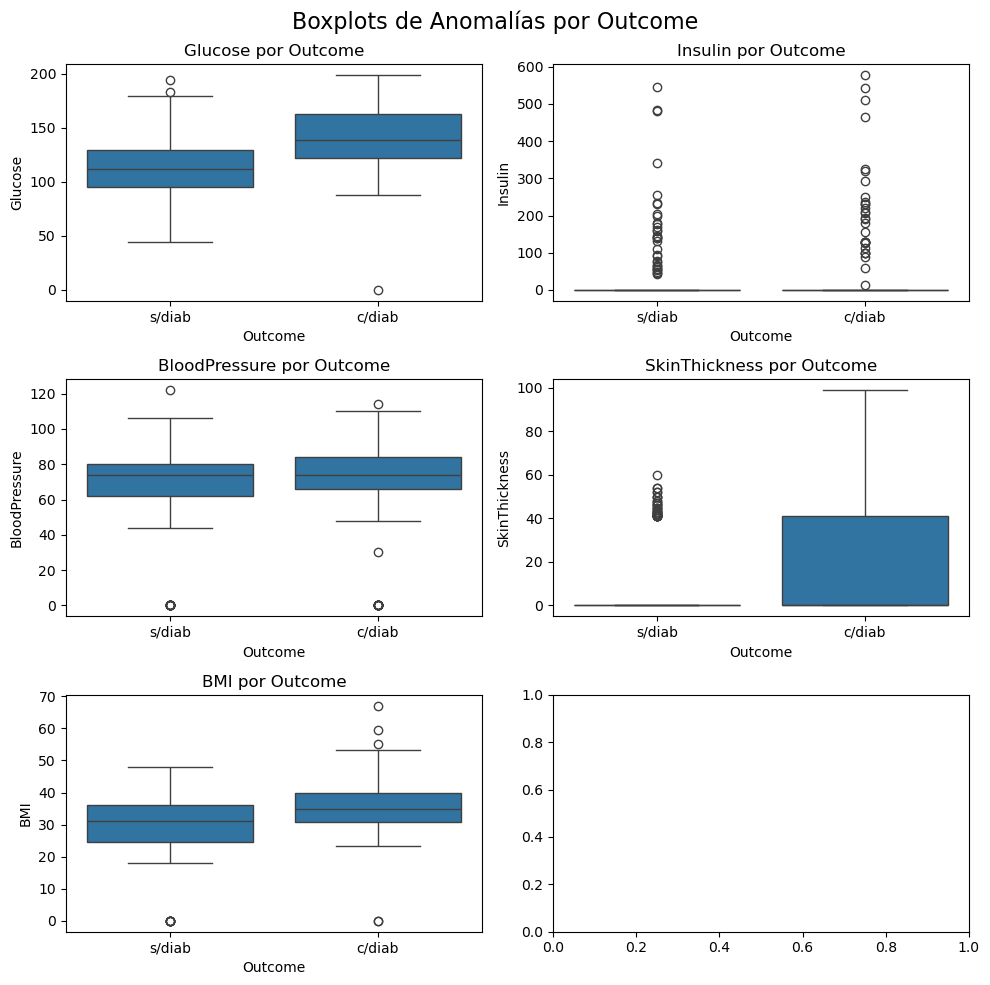

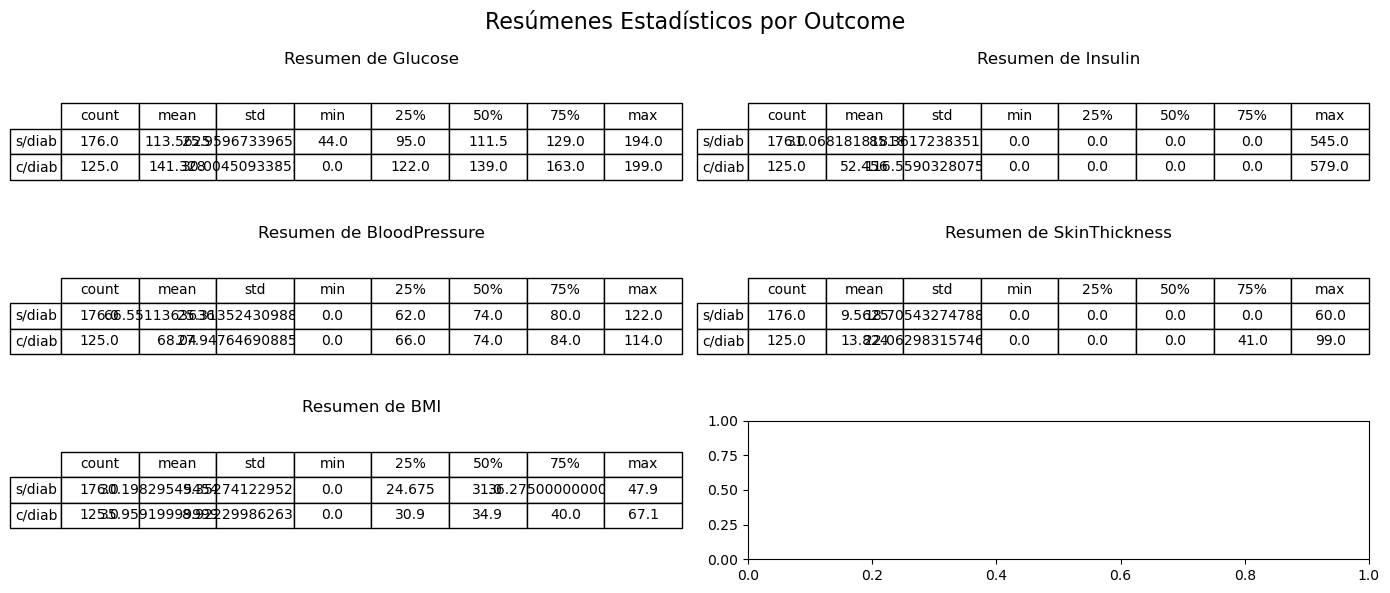

In [9]:
outcome_0,outcome_1 = analizar_y_graficar_anomalias(anormales.get('SkinThickness'),metricas=metricas)

In [10]:
df.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


##### Reemplazamos valores fuera de rango 

* Usando reglas asociadas a los valores de la fila misma, lo cual permite ejecutarlo sobre todo el dataset sin introducir data leakage. Son las siguientes:

    * Reemplazamos por NA los valores 0 de glucosa e insulina cuando espesor de huesos, presión sanguinea y/o BMI son 0, bajo el supuesto que es un problema de medición
    * Reemplazamos el valor de la Glucosa que queda con 0 al final
    * Reemplazamos los valores 0 de insulina or un NA cuando la Glucosa es NA y la insulina 0

In [11]:
cols_con_ceros = ['BloodPressure', 'SkinThickness', 'BMI']
df[cols_con_ceros] = df[cols_con_ceros].replace(0, np.nan)
df.loc[(df['Glucose'] == 0) & (df['SkinThickness'].isnull()), 'Glucose'] = np.nan
df.loc[(df['Glucose'] == 0) & (df['BloodPressure'].isnull()), 'Glucose'] = np.nan
df.loc[(df['Glucose'] == 0) & (df['BMI'].isnull()), 'Glucose'] = np.nan
df.loc[(df['Insulin'] == 0) & (df['SkinThickness'].isnull()), 'Insulin'] = np.nan
df.loc[(df['Insulin'] == 0) & (df['BloodPressure'].isnull()), 'Insulin'] = np.nan
df.loc[(df['Insulin'] == 0) & (df['BMI'].isnull()), 'Insulin'] = np.nan
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df.loc[(df['Insulin'] == 0) & (df['Glucose'].isnull()), 'Insulin'] = np.nan

##### Analizamos las distribuciones resultantes post reemplazos

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/454981190.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/454981190.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769

Columna: Glucose
Valores anormales encontrados: 4
count     4.000000
mean     53.500000
std       6.350853
min      44.000000
25%      53.000000
50%      56.500000
75%      57.000000
max      57.000000
Name: Glucose, dtype: float64
------------------------------
Columna: Insulin
Valores anormales encontrados: 304
count    304.00000
mean     137.25000
std      156.75009
min        0.00000
25%        0.00000
50%      152.00000
75%      210.00000
max      846.00000
Name: Insulin, dtype: float64
------------------------------
Columna: BloodPressure
Valores anormales encontrados: 29
count     29.000000
mean      71.724138
std       34.320856
min       24.000000
25%       44.000000
50%       48.000000
75%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64
------------------------------
Columna: SkinThickness
Valores anormales encontrados: 74
count    74.000000
mean     46.094595
std       7.714368
min      41.000000
25%      42.000000
50%      44.500000
75%      47.75000

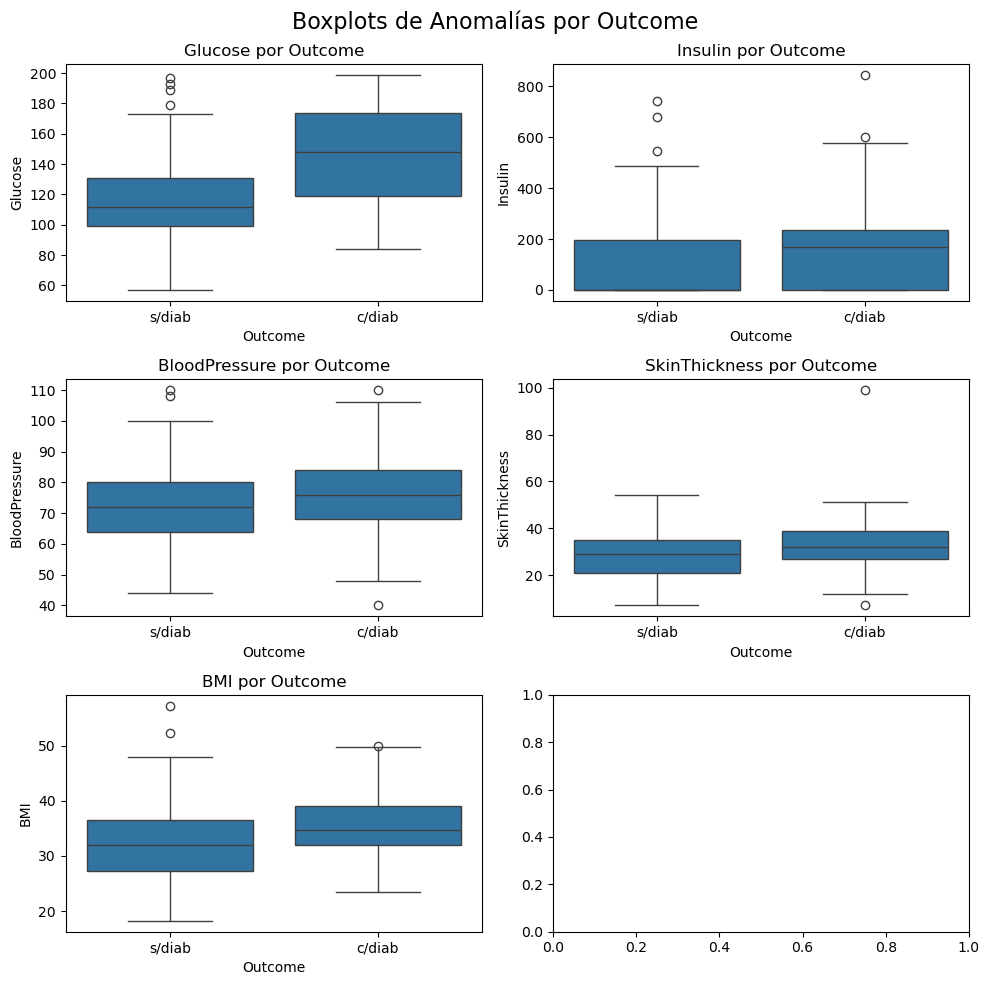

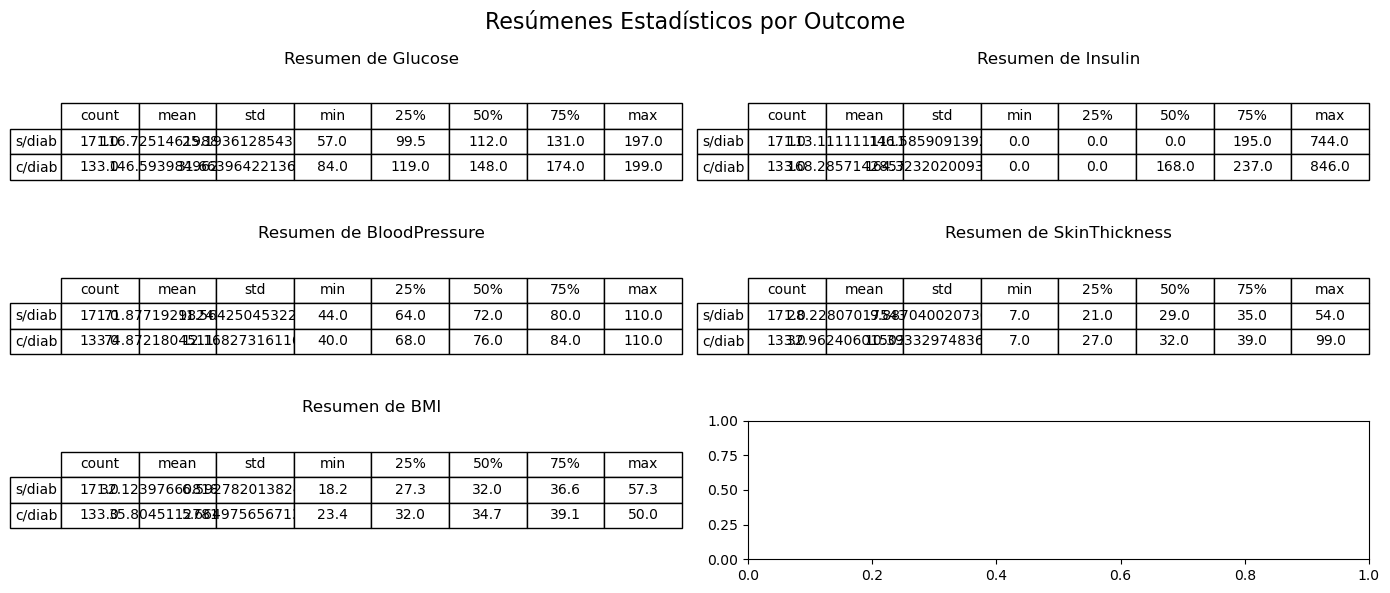

In [12]:
anormales = detectar_anomalias_individuales(df, rangos)
for columna, reglas in rangos.items():
    anormales_columna = df[df[columna].apply(reglas['anormal'])]
    print(f"Columna: {columna}")
    print(f"Valores anormales encontrados: {len(anormales_columna)}")
    print(anormales_columna[columna].describe())
    print("-" * 30)
outcome_0,outcome_1 = analizar_y_graficar_anomalias(anormales.get('Insulin'),metricas=metricas)

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,-0.005071,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.459920,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.007001,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.127493,0.648214,0.115016,0.166816,0.259491
Insulin,-0.005071,0.459920,0.007001,0.127493,1.000000,0.192024,0.149052,0.082703,0.213154
BMI,0.021719,0.232771,0.289230,0.648214,0.192024,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.149052,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.082703,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.213154,0.313680,0.173844,0.238356,1.000000


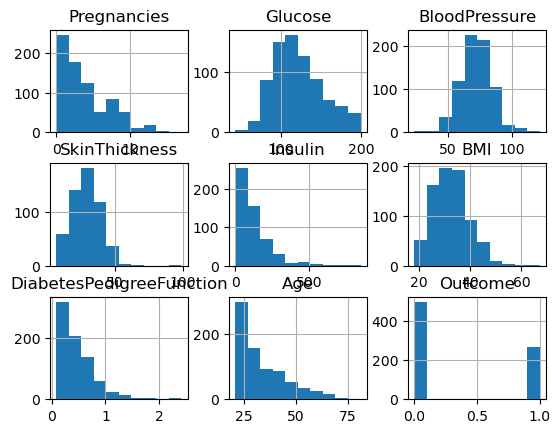

In [14]:
df.hist();

##### Generamos un reemplazo final en la insulina

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/454981190.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/454981190.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769

Columna: Glucose
Valores anormales encontrados: 4
count     4.000000
mean     53.500000
std       6.350853
min      44.000000
25%      53.000000
50%      56.500000
75%      57.000000
max      57.000000
Name: Glucose, dtype: float64
------------------------------
Columna: Insulin
Valores anormales encontrados: 164
count    164.000000
mean     254.414634
std      125.231364
min      142.000000
25%      174.000000
50%      206.000000
75%      286.500000
max      846.000000
Name: Insulin, dtype: float64
------------------------------
Columna: BloodPressure
Valores anormales encontrados: 29
count     29.000000
mean      71.724138
std       34.320856
min       24.000000
25%       44.000000
50%       48.000000
75%      106.000000
max      122.000000
Name: BloodPressure, dtype: float64
------------------------------
Columna: SkinThickness
Valores anormales encontrados: 74
count    74.000000
mean     46.094595
std       7.714368
min      41.000000
25%      42.000000
50%      44.500000
75%      

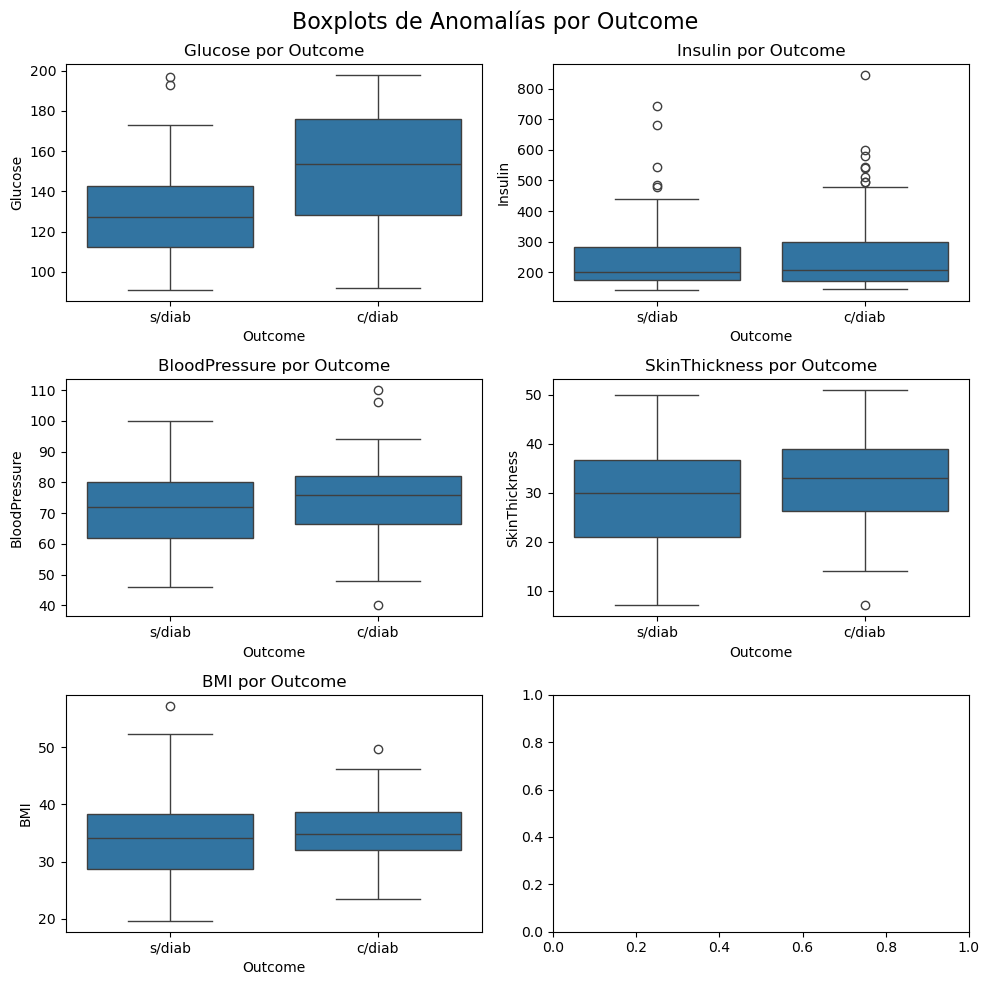

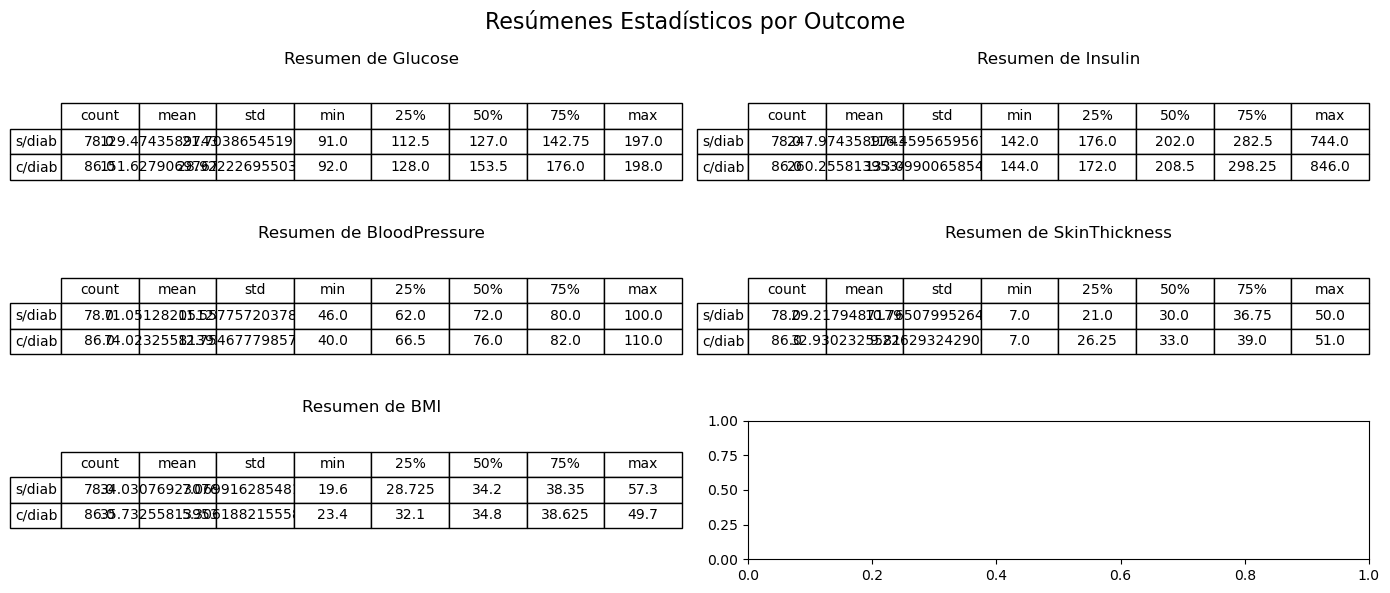

In [15]:
df['Insulin'] = df['Insulin'].replace(0, np.nan)
anormales = detectar_anomalias_individuales(df, rangos)
for columna, reglas in rangos.items():
    anormales_columna = df[df[columna].apply(reglas['anormal'])]
    print(f"Columna: {columna}")
    print(f"Valores anormales encontrados: {len(anormales_columna)}")
    print(anormales_columna[columna].describe())
    print("-" * 30)
outcome_0,outcome_1 = analizar_y_graficar_anomalias(anormales.get('Insulin'),metricas=metricas)

In [16]:
df.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [17]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
Insulin,394,374,48.70
SkinThickness,541,227,29.56
BloodPressure,733,35,4.56
BMI,757,11,1.43
Glucose,763,5,0.65
Pregnancies,768,0,0.00
DiabetesPedigreeFunction,768,0,0.00
Age,768,0,0.00
Outcome,768,0,0.00


## **2. Exploración de Datos:**

### Transformaciones y funciones a utilizar

In [18]:
df = categorizar_bmi(df)
df = categorizar_insulina(df)
df = categorizar_skin_thickness(df)
df = categorizar_glucosa(df)
df = categorizar_blood_pressure(df)
df = categorizar_pregnancies(df)
columnas_cat = [col for col in df.columns if col.endswith('_cat')]
columnas_cat.append('Outcome')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_cat,insulin_cat,skin_thickness_cat,glucosa_cat,blood_pressure_cat,pregnancies_cat
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,obesidad,NaN,alto,normal,normal,high
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,sobrepeso,NaN,alto,normal,normal,low
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,peso_normal,NaN,NaN,alto,normal,high
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,sobrepeso,normal,normal,normal,normal,low
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,obesidad,high,alto,normal,bajo,low


In [19]:
def analizar_relacion(df, columna_target, columna_explicativa_cat,columna_explicativa_num):
    """
    Analiza la relación entre una columna objetivo y una columna explicativa, y genera tablas y gráficos.
    
    Parámetros:
    - df: DataFrame que contiene las columnas objetivo y explicativa.
    - columna_target: Nombre de la columna objetivo (e.g., 'Outcome').
    - columna_explicativa: Nombre de la columna explicativa (e.g., 'insulin_cat').
    
    Retorna:
    - Tablas cruzadas y gráficos para el análisis.
    """
    # Crear tablas cruzadas
    print(f"Tabla cruzada normalizada por índice ({columna_target}):")
    print(pd.crosstab(df[columna_target], df[columna_explicativa_cat], margins=True, normalize='index'))
    
    print(f"\nTabla cruzada normalizada por columnas ({columna_explicativa_cat}):")
    print(pd.crosstab(df[columna_target], df[columna_explicativa_cat], margins=True, normalize='columns'))
    
    print("\nTabla cruzada absoluta:")
    print(pd.crosstab(df[columna_target], df[columna_explicativa_cat], margins=True))
    
    # Estadísticas descriptivas de la columna explicativa agrupadas por el target
    print(f"\nEstadísticas descriptivas de {columna_explicativa_num} agrupadas por {columna_target}:")
    print(df.groupby(columna_target).describe()[columna_explicativa_num])
    
    # Crear el boxplot de la columna explicativa por el target
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=columna_target, y=columna_explicativa_num, data=df, palette='Set2')
    plt.title(f'Distribución de {columna_explicativa_num} por {columna_target}', fontsize=14)
    plt.xlabel(columna_target, fontsize=12)
    plt.ylabel(columna_explicativa_num, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

import pandas as pd
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

def calcular_informacion_mutua(df, columna_target, tipo_target='categoric'):
    """
    Calcula la Información Mutua entre una columna objetivo y el resto de las variables en el DataFrame.
    
    Parámetros:
    - df: DataFrame que contiene las variables.
    - columna_target: Nombre de la columna objetivo (e.g., 'Outcome').
    - tipo_target: Tipo de la columna objetivo ('categoric' o 'numeric').
    
    Retorna:
    - DataFrame con las puntuaciones de Información Mutua para cada variable.
    """
    # Separar las variables explicativas y el objetivo
    X = df.drop(columna_target, axis=1)
    y = df[columna_target]
    
    # Convertir el objetivo a tipo categórico si es necesario
    if tipo_target == 'categoric':
        y = y.astype('category')
    
    # Determinar la función de Información Mutua según el tipo de target
    if tipo_target == 'categoric':
        mi_scores = mutual_info_classif(X, y)
    elif tipo_target == 'numeric':
        mi_scores = mutual_info_regression(X, y)
    else:
        raise ValueError("El tipo_target debe ser 'categoric' o 'numeric'.")
    
    # Crear un DataFrame con los resultados
    mi_df = pd.DataFrame({
        'Variable': X.columns,
        'Mutual_Information': mi_scores
    })
    
    # Ordenar las variables por puntuación de Información Mutua
    mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)
    
    return mi_df


### Visualizaciones univariadas y multivariadas

#### Glucosa

Tabla cruzada normalizada por índice (Outcome):
glucosa_cat      bajo    normal      alto
Outcome                                  
0            0.008048  0.955734  0.036217
1            0.000000  0.684211  0.315789
All          0.005242  0.861075  0.133683

Tabla cruzada normalizada por columnas (glucosa_cat):
glucosa_cat  bajo    normal      alto       All
Outcome                                        
0             1.0  0.722983  0.176471  0.651376
1             0.0  0.277017  0.823529  0.348624

Tabla cruzada absoluta:
glucosa_cat  bajo  normal  alto  All
Outcome                             
0               4     475    18  497
1               0     182    84  266
All             4     657   102  763

Estadísticas descriptivas de Glucose agrupadas por Outcome:
         count        mean        std   min    25%    50%    75%    max
Outcome                                                                
0        497.0  110.643863  24.776906  44.0   93.0  107.0  125.0  197.0
1       

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/62072491.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_target, y=columna_explicativa_num, data=df, palette='Set2')


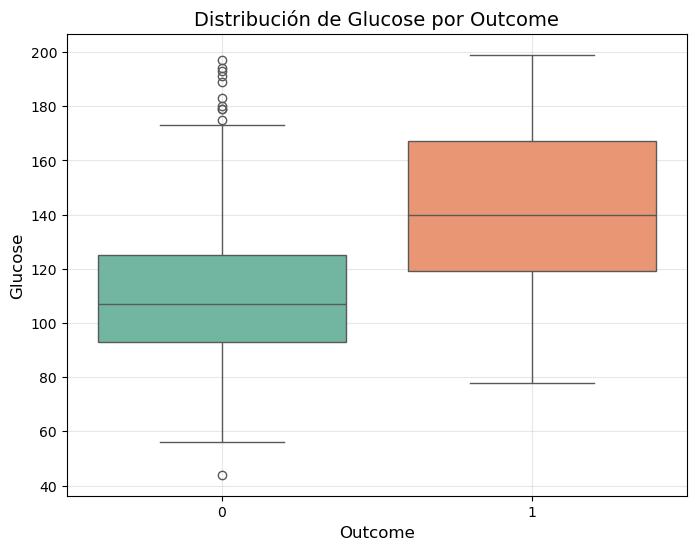

In [20]:
analizar_relacion(df, 'Outcome', 'glucosa_cat','Glucose')

#### Insulina

Tabla cruzada normalizada por índice (Outcome):
insulin_cat    normal      high
Outcome                        
0            0.674242  0.325758
1            0.330769  0.669231
All          0.560914  0.439086

Tabla cruzada normalizada por columnas (insulin_cat):
insulin_cat   normal     high       All
Outcome                                
0            0.80543  0.49711  0.670051
1            0.19457  0.50289  0.329949

Tabla cruzada absoluta:
insulin_cat  normal  high  All
Outcome                       
0               178    86  264
1                43    87  130
All             221   173  394

Estadísticas descriptivas de Insulin agrupadas por Outcome:
         count        mean         std   min    25%    50%     75%    max
Outcome                                                                  
0        264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0
1        130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0


/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/62072491.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_target, y=columna_explicativa_num, data=df, palette='Set2')


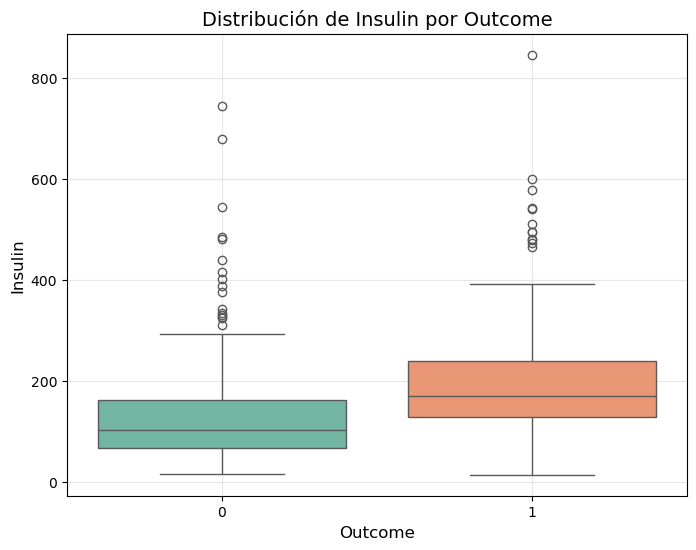

In [21]:
analizar_relacion(df, 'Outcome', 'insulin_cat','Insulin')

#### Espesor de huesos

Tabla cruzada normalizada por índice (Outcome):
skin_thickness_cat    normal      alto
Outcome                               
0                   0.418283  0.581717
1                   0.183333  0.816667
All                 0.340111  0.659889

Tabla cruzada normalizada por columnas (skin_thickness_cat):
skin_thickness_cat    normal      alto       All
Outcome                                         
0                   0.820652  0.588235  0.667283
1                   0.179348  0.411765  0.332717

Tabla cruzada absoluta:
skin_thickness_cat  normal  alto  All
Outcome                              
0                      151   210  361
1                       33   147  180
All                    184   357  541

Estadísticas descriptivas de SkinThickness agrupadas por Outcome:
         count       mean        std  min   25%   50%   75%   max
Outcome                                                          
0        361.0  27.235457  10.026491  7.0  19.0  27.0  33.0  60.0
1        180.0  33.

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/62072491.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_target, y=columna_explicativa_num, data=df, palette='Set2')


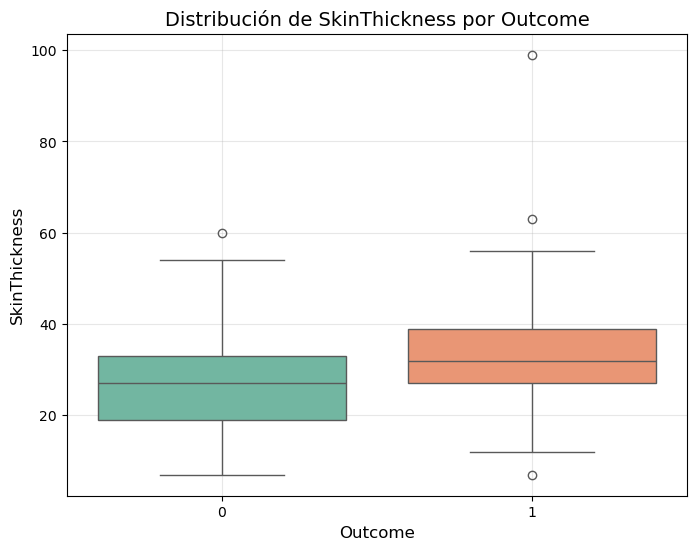

In [22]:
analizar_relacion(df, 'Outcome', 'skin_thickness_cat','SkinThickness')

#### BMI

Tabla cruzada normalizada por índice (Outcome):
bmi_cat  bajo_peso  peso_normal  sobrepeso  obesidad
Outcome                                             
0         0.008147     0.193483   0.283096  0.515275
1         0.000000     0.026316   0.150376  0.823308
All       0.005284     0.134742   0.236460  0.623514

Tabla cruzada normalizada por columnas (bmi_cat):
bmi_cat  bajo_peso  peso_normal  sobrepeso  obesidad       All
Outcome                                                       
0              1.0     0.931373   0.776536  0.536017  0.648613
1              0.0     0.068627   0.223464  0.463983  0.351387

Tabla cruzada absoluta:
bmi_cat  bajo_peso  peso_normal  sobrepeso  obesidad  All
Outcome                                                  
0                4           95        139       253  491
1                0            7         40       219  266
All              4          102        179       472  757

Estadísticas descriptivas de BMI agrupadas por Outcome:
         cou

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/62072491.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_target, y=columna_explicativa_num, data=df, palette='Set2')


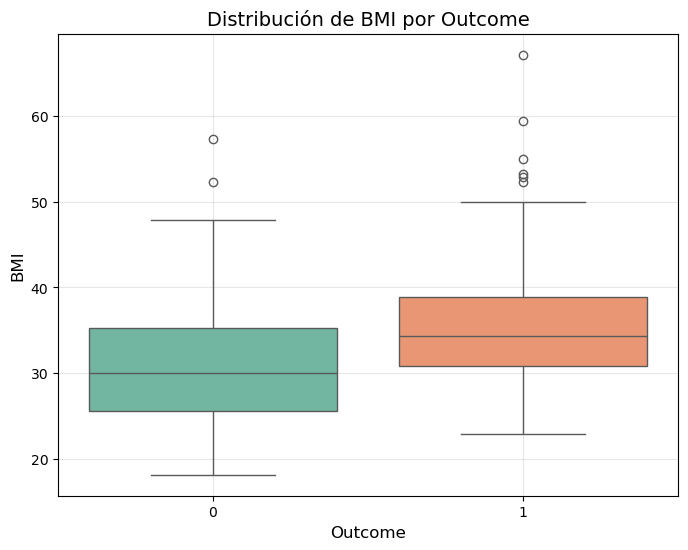

In [23]:
analizar_relacion(df, 'Outcome', 'bmi_cat','BMI')

#### Presión sanguinea

Tabla cruzada normalizada por índice (Outcome):
blood_pressure_cat      bajo    normal      alto
Outcome                                         
0                   0.027027  0.958420  0.014553
1                   0.011905  0.952381  0.035714
All                 0.021828  0.956344  0.021828

Tabla cruzada normalizada por columnas (blood_pressure_cat):
blood_pressure_cat    bajo    normal    alto       All
Outcome                                               
0                   0.8125  0.657632  0.4375  0.656207
1                   0.1875  0.342368  0.5625  0.343793

Tabla cruzada absoluta:
blood_pressure_cat  bajo  normal  alto  All
Outcome                                    
0                     13     461     7  481
1                      3     240     9  252
All                   16     701    16  733

Estadísticas descriptivas de BloodPressure agrupadas por Outcome:
         count       mean        std   min   25%   50%   75%    max
Outcome                                      

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/62072491.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_target, y=columna_explicativa_num, data=df, palette='Set2')


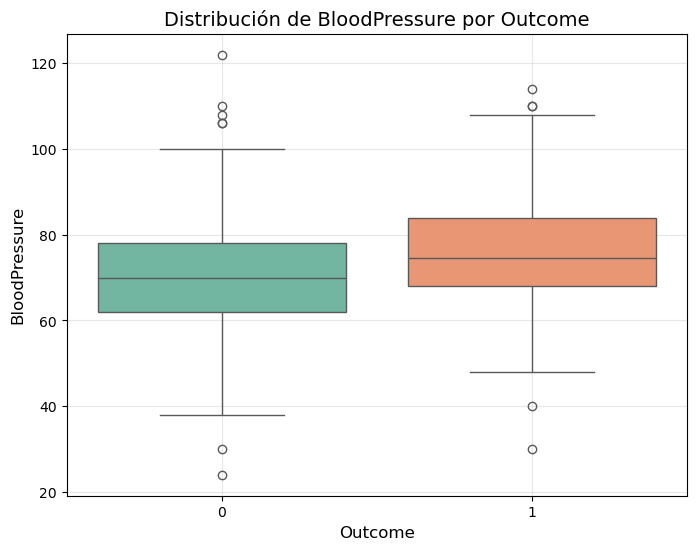

In [24]:
analizar_relacion(df, 'Outcome', 'blood_pressure_cat','BloodPressure')

#### Embarazos

Tabla cruzada normalizada por índice (Outcome):
pregnancies_cat       low    normal      high
Outcome                                      
0                0.526000  0.258000  0.216000
1                0.320896  0.264925  0.414179
All              0.454427  0.260417  0.285156

Tabla cruzada normalizada por columnas (pregnancies_cat):
pregnancies_cat       low  normal      high       All
Outcome                                              
0                0.753582   0.645  0.493151  0.651042
1                0.246418   0.355  0.506849  0.348958

Tabla cruzada absoluta:
pregnancies_cat  low  normal  high  All
Outcome                                
0                263     129   108  500
1                 86      71   111  268
All              349     200   219  768

Estadísticas descriptivas de Pregnancies agrupadas por Outcome:
         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.01718

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_26769/62072491.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_target, y=columna_explicativa_num, data=df, palette='Set2')


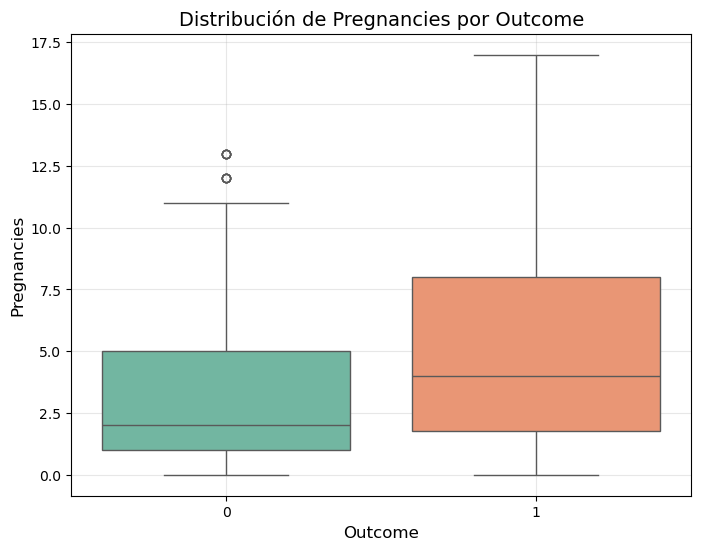

In [25]:
analizar_relacion(df, 'Outcome', 'pregnancies_cat','Pregnancies')

### Estadísticas descriptivas

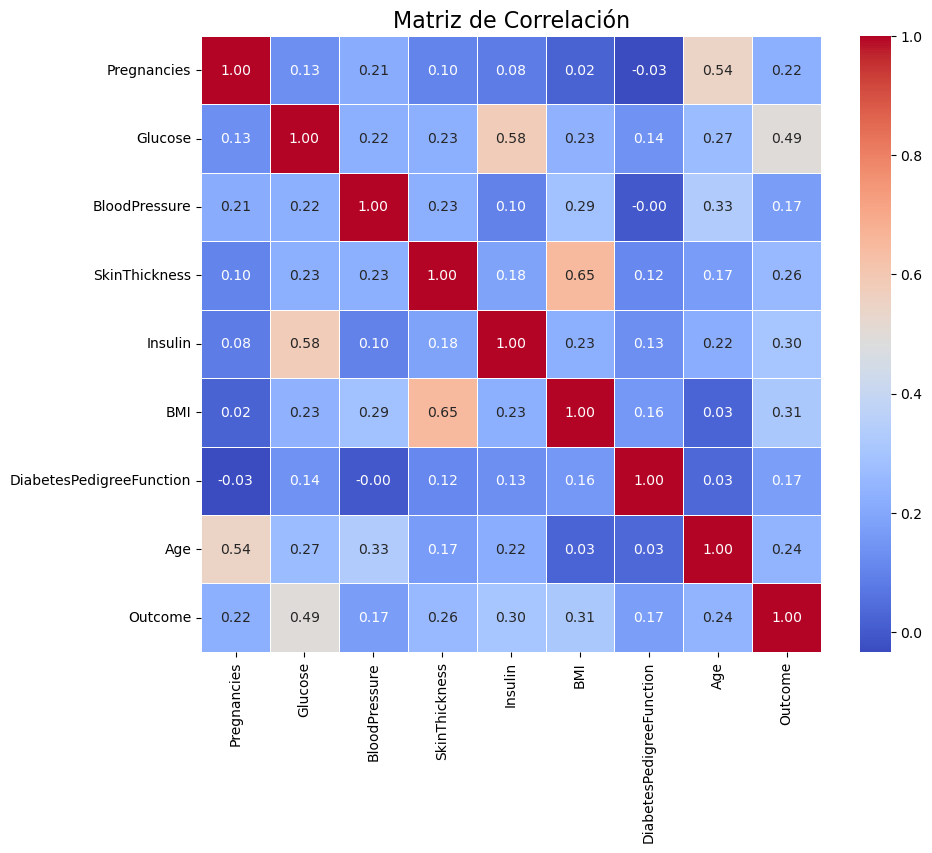

In [26]:
# Calcular la matriz de correlación
matriz_correlacion = df.corr(numeric_only=True)
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [27]:
# Convertir columnas categóricas a numéricas si es necesario

df_cleaned = df.dropna(how='any')
df_encoded = df_cleaned.copy()
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_cleaned[col])

# Calcular Chi-cuadrado
chi2_scores, p_values = chi2(df_encoded[categorical_columns], df_encoded['Outcome'])

# Mostrar resultados
chi2_df = pd.DataFrame({
    'Feature': categorical_columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_df)

              Feature  Chi2 Score   P-value
3         glucosa_cat   20.418035  0.000006
1         insulin_cat   18.083183  0.000021
2  skin_thickness_cat   13.062461  0.000301
0             bmi_cat    7.943514  0.004826
5     pregnancies_cat    2.654319  0.103269
4  blood_pressure_cat    0.024946  0.874501


In [28]:
df_encoded = df.copy()
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
# Entrenar un Random Forest
rf = RandomForestClassifier(random_state=42,n_estimators=300,max_depth=2,min_samples_leaf=3,min_samples_split=3)
rf.fit(df_encoded.drop(columns=['Outcome']), df_encoded['Outcome'])

# Obtener importancias
importances = rf.feature_importances_

# Mostrar resultados
rf_importances = pd.DataFrame({
    'Feature': df_encoded.drop(columns=['Outcome']).columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(rf_importances)

                     Feature  Importance
1                    Glucose    0.314341
11               glucosa_cat    0.188481
7                        Age    0.115954
5                        BMI    0.112397
8                    bmi_cat    0.082882
4                    Insulin    0.050729
0                Pregnancies    0.047829
6   DiabetesPedigreeFunction    0.024806
3              SkinThickness    0.019716
13           pregnancies_cat    0.016158
9                insulin_cat    0.011612
2              BloodPressure    0.011526
10        skin_thickness_cat    0.002699
12        blood_pressure_cat    0.000871


In [29]:
# Entrenar un Random Forest
gb = XGBClassifier(random_state=42,learning_rate=0.05,n_estimators=300,max_depth=2,min_samples_leaf=3,min_samples_split=3)
gb.fit(df_encoded.drop(columns=['Outcome']), df_encoded['Outcome'])

# Obtener importancias
importances = rf.feature_importances_

# Mostrar resultados
rf_importances = pd.DataFrame({
    'Feature': df_encoded.drop(columns=['Outcome']).columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(rf_importances)

/opt/miniconda3/envs/mitic-data-science-team-1-septiembre-2024-ML/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:35:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1732150532678/work/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


                     Feature  Importance
1                    Glucose    0.314341
11               glucosa_cat    0.188481
7                        Age    0.115954
5                        BMI    0.112397
8                    bmi_cat    0.082882
4                    Insulin    0.050729
0                Pregnancies    0.047829
6   DiabetesPedigreeFunction    0.024806
3              SkinThickness    0.019716
13           pregnancies_cat    0.016158
9                insulin_cat    0.011612
2              BloodPressure    0.011526
10        skin_thickness_cat    0.002699
12        blood_pressure_cat    0.000871


## **3. Implementación de Modelo: Entrenamiento**

### Modelos de Clasificación

#### Entrenamiento y Evaluación de Modelos con las variables numéricas

##### Selección de variables

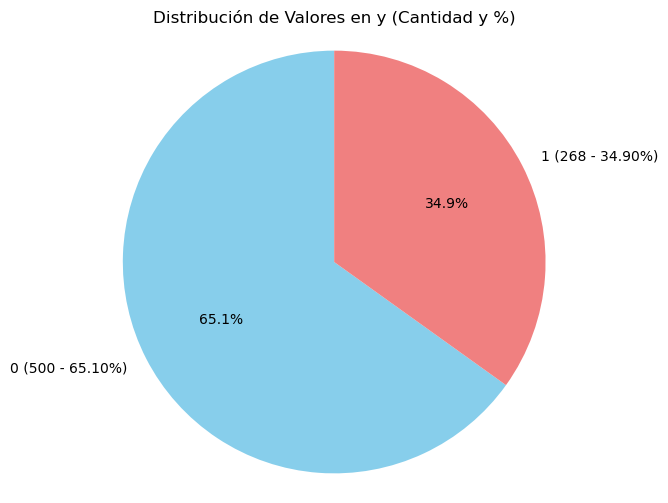

In [30]:
#X = df[[col for col in df.columns if not col.endswith('_cat') and col != 'Outcome']]
col = ['Glucose','Age','BMI','Pregnancies','DiabetesPedigreeFunction']
X = df[col]
y = df['Outcome']

# Calcular las proporciones y cantidades
value_counts = y.value_counts()
percentages = value_counts / value_counts.sum() * 100

# Crear etiquetas con cantidad y porcentaje
labels = [f"{idx} ({count} - {pct:.2f}%)" for idx, count, pct in zip(value_counts.index, value_counts, percentages)]

# Graficar la torta
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Valores en y (Cantidad y %)')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.show()

##### Sin imputación de datos

Model Evaluation Results:
           Model  Train Recall  Test Recall  Train AUC  Test AUC  \
0  Random Forest      0.466154     0.417910   0.826297  0.806090   
1        XGBoost      0.577564     0.597015   0.816955  0.826030   
2       CatBoost      0.603590     0.567164   0.825009  0.800478   

   Train Accuracy  Test Accuracy  Train F1-Score  Test F1-Score  
0        0.761868       0.734375        0.575937       0.523364  
1        0.744137       0.760417        0.608612       0.634921  
2        0.763748       0.723958        0.638749       0.589147  


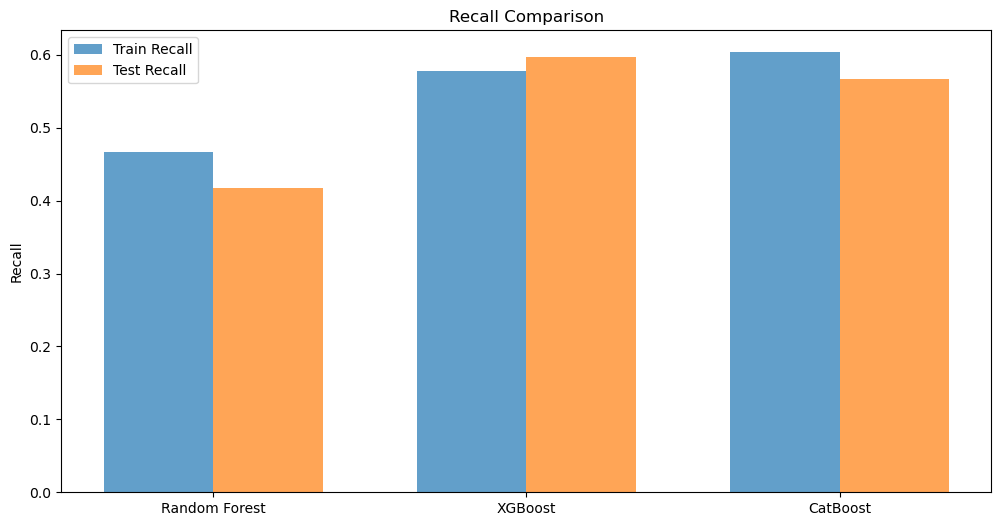

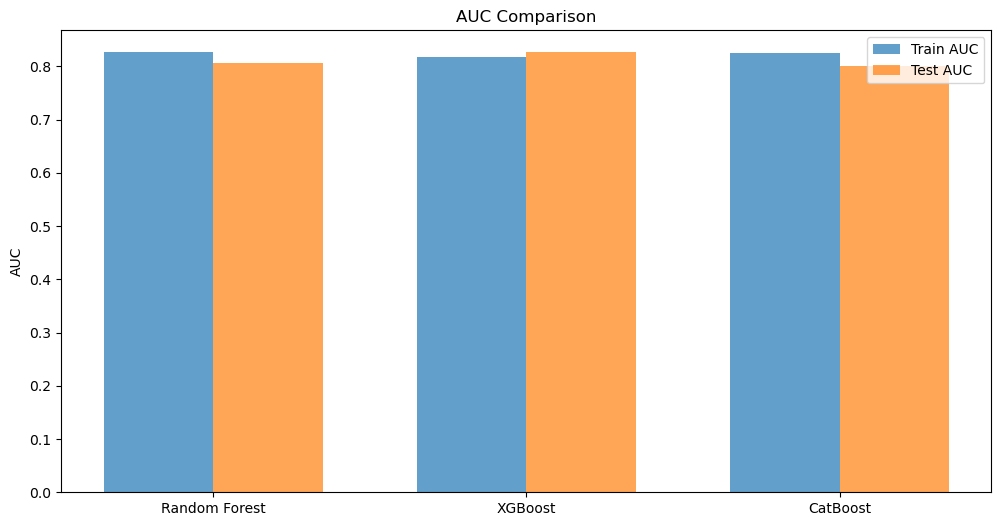

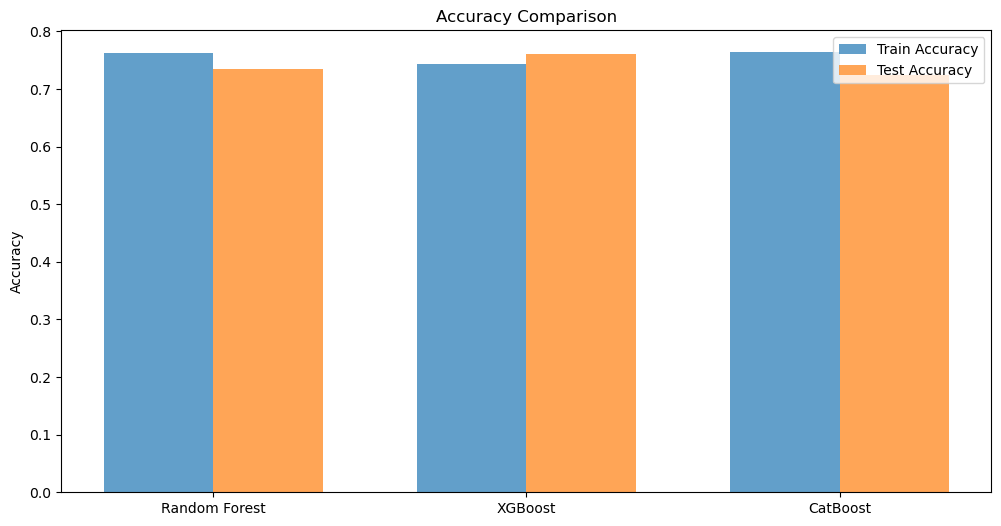

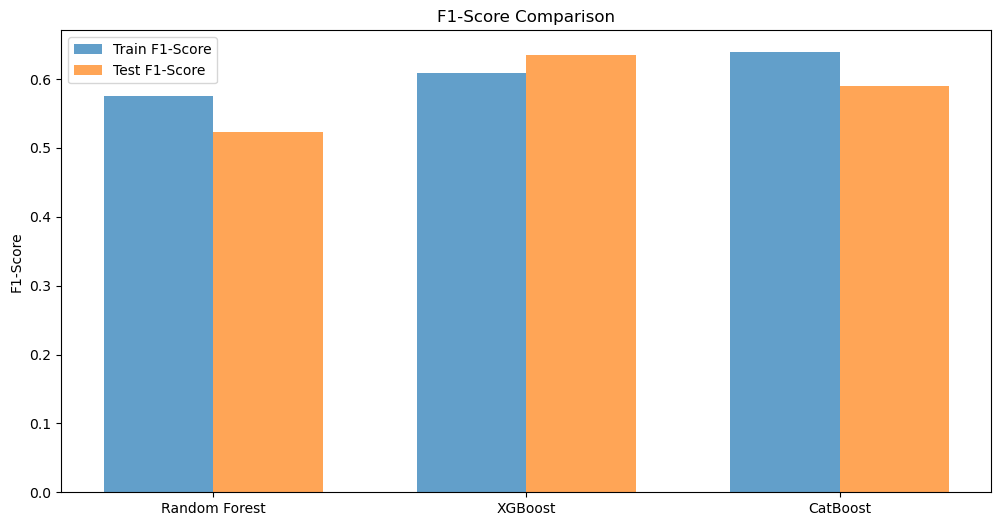

In [31]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Manejo de NaN: Eliminar en entrenamiento, mantener en test
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300, max_depth=2, min_samples_leaf=3, min_samples_split=3),
    "XGBoost": XGBClassifier(learning_rate=0.1, eval_metric='logloss', random_state=42, n_estimators=300, max_depth=2),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42,learning_rate=0.1)
}

# Inicializar el KFold para validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar un diccionario para almacenar las métricas
results = {
    "Model": [],
    "Train Recall": [],
    "Test Recall": [],
    "Train AUC": [],
    "Test AUC": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Train F1-Score": [],
    "Test F1-Score": []
}

# Entrenar los modelos con validación cruzada
for name, model in models.items():
    # Validación cruzada en el conjunto de entrenamiento
    train_recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    train_aucs = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    train_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    train_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    
    # Entrenar en el conjunto de entrenamiento completo
    model.fit(X_train, y_train)
    
    # Evaluar en el conjunto de prueba
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    test_recall = recall_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Guardar los resultados
    results["Model"].append(name)
    results["Train Recall"].append(np.mean(train_recall))
    results["Test Recall"].append(test_recall)
    results["Train AUC"].append(np.mean(train_aucs))
    results["Test AUC"].append(test_auc)
    results["Train Accuracy"].append(np.mean(train_accuracy))
    results["Test Accuracy"].append(test_accuracy)
    results["Train F1-Score"].append(np.mean(train_f1))
    results["Test F1-Score"].append(test_f1)

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados
print("Model Evaluation Results:")
print(results_df)

# Graficar las métricas
metrics_to_plot = ["Recall", "AUC", "Accuracy", "F1-Score"]
x = np.arange(len(results["Model"]))
width = 0.35

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    plt.bar(x - width / 2, results_df[f"Train {metric}"], width, label=f'Train {metric}', alpha=0.7)
    plt.bar(x + width / 2, results_df[f"Test {metric}"], width, label=f'Test {metric}', alpha=0.7)
    plt.xticks(x, results["Model"])
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.legend()
    plt.show()


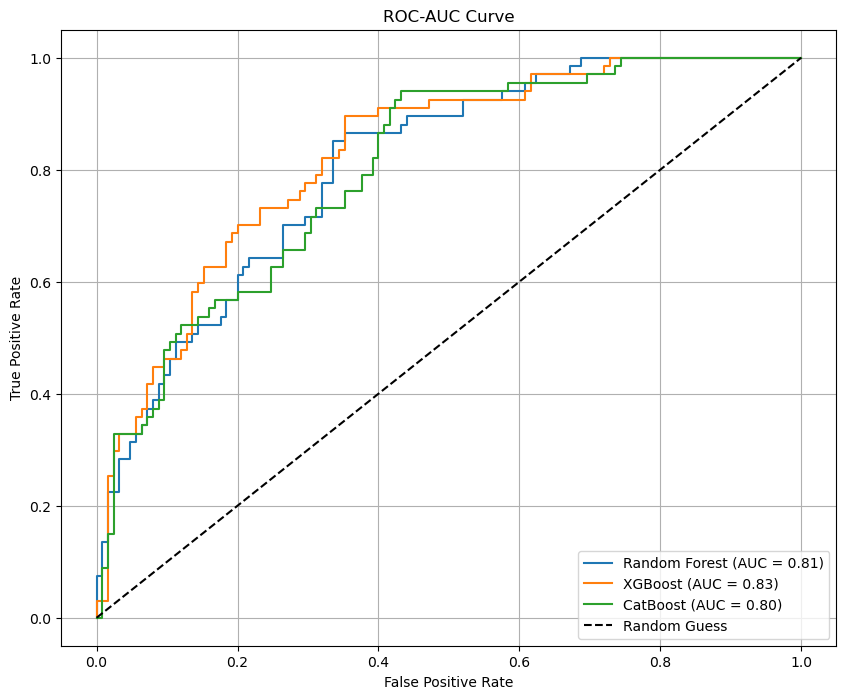

In [32]:
# Graficar la curva ROC para cada modelo
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Obtener las probabilidades para el conjunto de prueba
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Agregar la línea diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Configuración del gráfico
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


##### Con imputación de datos sin introducir ***data leakage***

Model Evaluation Results:
           Model  Train Recall  Test Recall  Train AUC  Test AUC  \
0  Random Forest      0.453049     0.417910   0.820024  0.800716   
1        XGBoost      0.587317     0.641791   0.812766  0.829970   
2       CatBoost      0.606951     0.567164   0.829101  0.803463   

   Train Accuracy  Test Accuracy  Train F1-Score  Test F1-Score  
0        0.758726       0.734375        0.561803       0.523364  
1        0.763928       0.776042        0.634350       0.666667  
2        0.765607       0.734375        0.644507       0.598425  


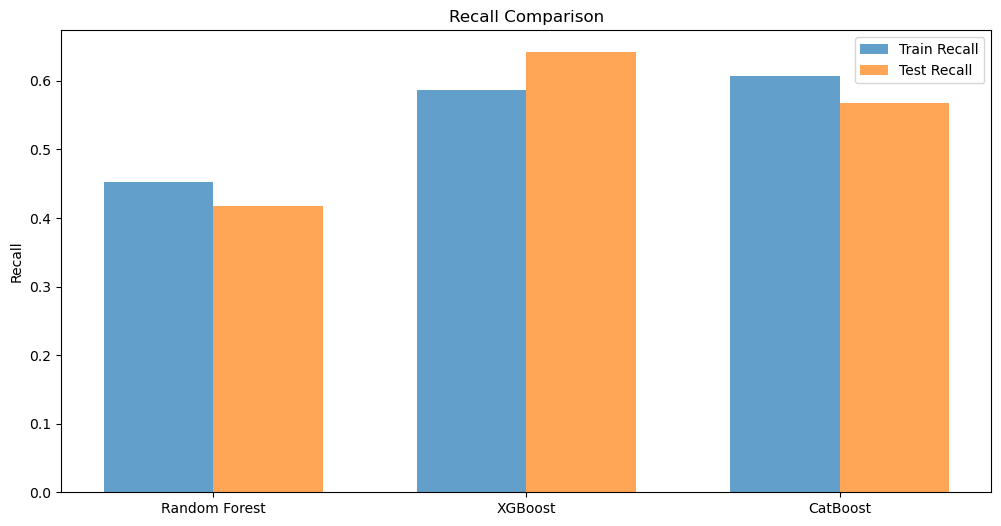

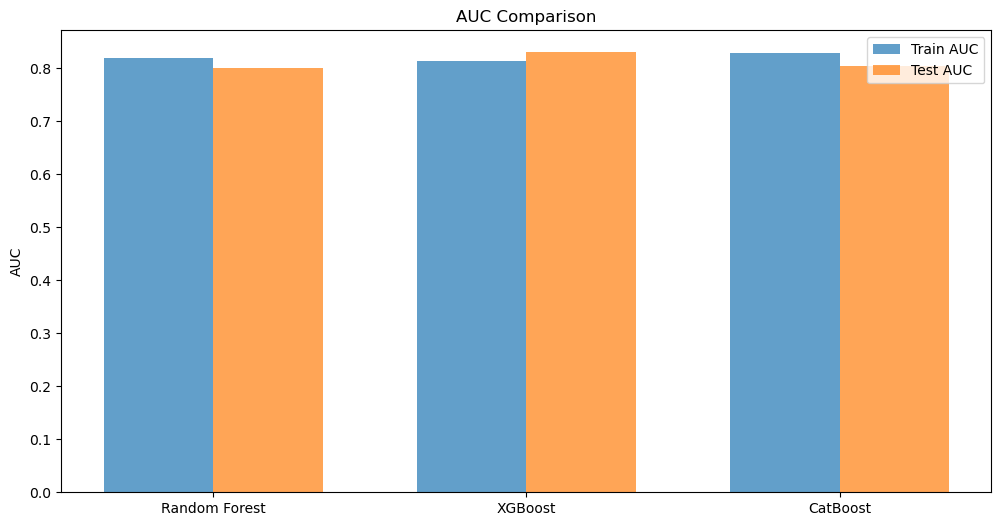

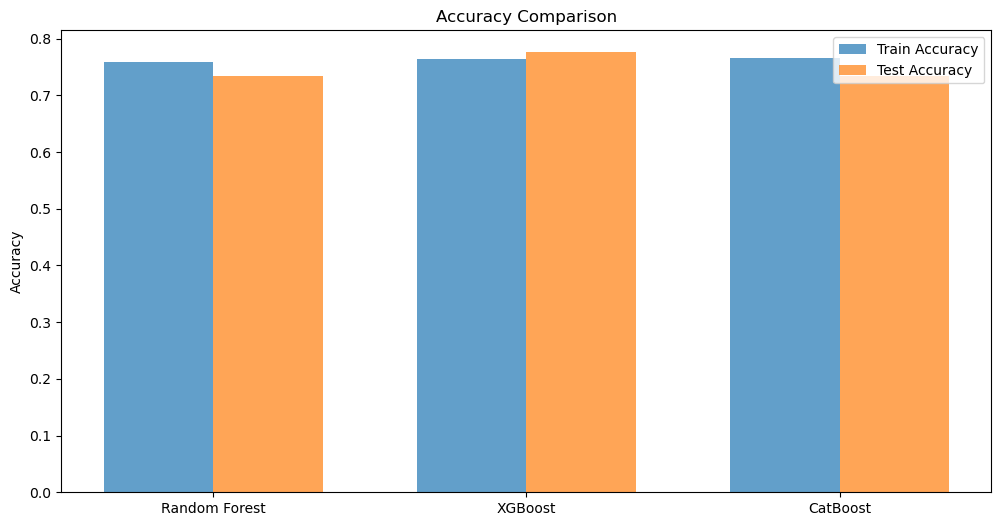

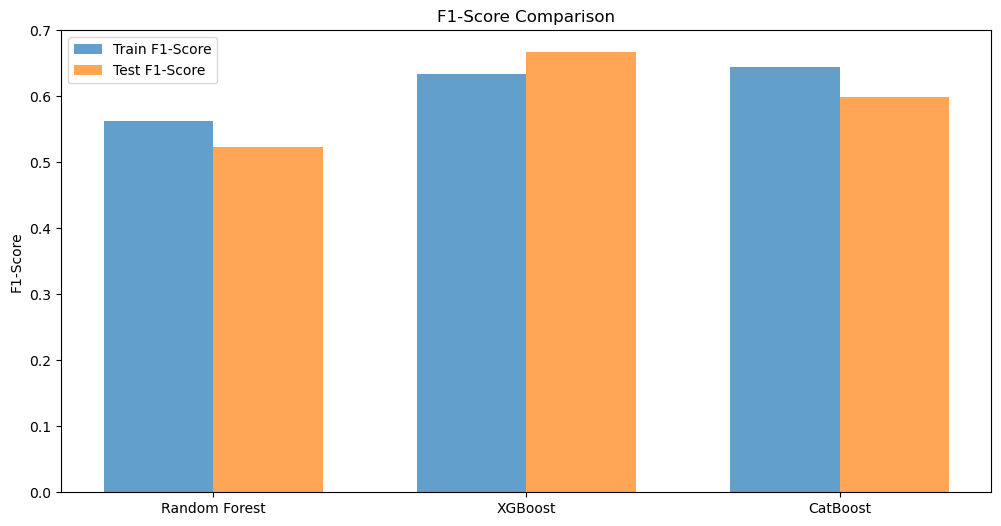

In [33]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Definir las columnas para imputación
median_impute_cols = ['DiabetesPedigreeFunction','Pregnancies','Age']
mean_impute_cols = ['BMI', 'Glucose']

# Crear transformaciones para imputación
median_imputer = ('median_imputer', SimpleImputer(strategy='median'), median_impute_cols)
mean_imputer = ('mean_imputer', SimpleImputer(strategy='mean'), mean_impute_cols)

# Crear un ColumnTransformer para aplicar las imputaciones
preprocessor = ColumnTransformer(
    transformers=[
        median_imputer,
        mean_imputer
    ],
    remainder='passthrough'  # Mantener el resto de las columnas sin cambios
)

# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300, max_depth=2, min_samples_leaf=3, min_samples_split=3),
    "XGBoost": XGBClassifier(learning_rate=0.1, eval_metric='logloss', random_state=42, n_estimators=300, max_depth=2),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42, learning_rate=0.1)
}

# Inicializar el KFold para validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar un diccionario para almacenar las métricas
results = {
    "Model": [],
    "Train Recall": [],
    "Test Recall": [],
    "Train AUC": [],
    "Test AUC": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Train F1-Score": [],
    "Test F1-Score": []
}

# Entrenar los modelos con validación cruzada
for name, model in models.items():
    # Crear un pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Validación cruzada en el conjunto de entrenamiento
    train_recall = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
    train_aucs = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
    train_accuracy = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    train_f1 = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

    # Entrenar en el conjunto de entrenamiento completo
    pipeline.fit(X_train, y_train)

    # Evaluar en el conjunto de prueba
    y_test_pred = pipeline.predict(X_test)
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]
    test_recall = recall_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Guardar los resultados
    results["Model"].append(name)
    results["Train Recall"].append(np.mean(train_recall))
    results["Test Recall"].append(test_recall)
    results["Train AUC"].append(np.mean(train_aucs))
    results["Test AUC"].append(test_auc)
    results["Train Accuracy"].append(np.mean(train_accuracy))
    results["Test Accuracy"].append(test_accuracy)
    results["Train F1-Score"].append(np.mean(train_f1))
    results["Test F1-Score"].append(test_f1)

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados
print("Model Evaluation Results:")
print(results_df)

# Graficar las métricas
metrics_to_plot = ["Recall", "AUC", "Accuracy", "F1-Score"]
x = np.arange(len(results["Model"]))
width = 0.35

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    plt.bar(x - width / 2, results_df[f"Train {metric}"], width, label=f'Train {metric}', alpha=0.7)
    plt.bar(x + width / 2, results_df[f"Test {metric}"], width, label=f'Test {metric}', alpha=0.7)
    plt.xticks(x, results["Model"])
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.legend()
    plt.show()


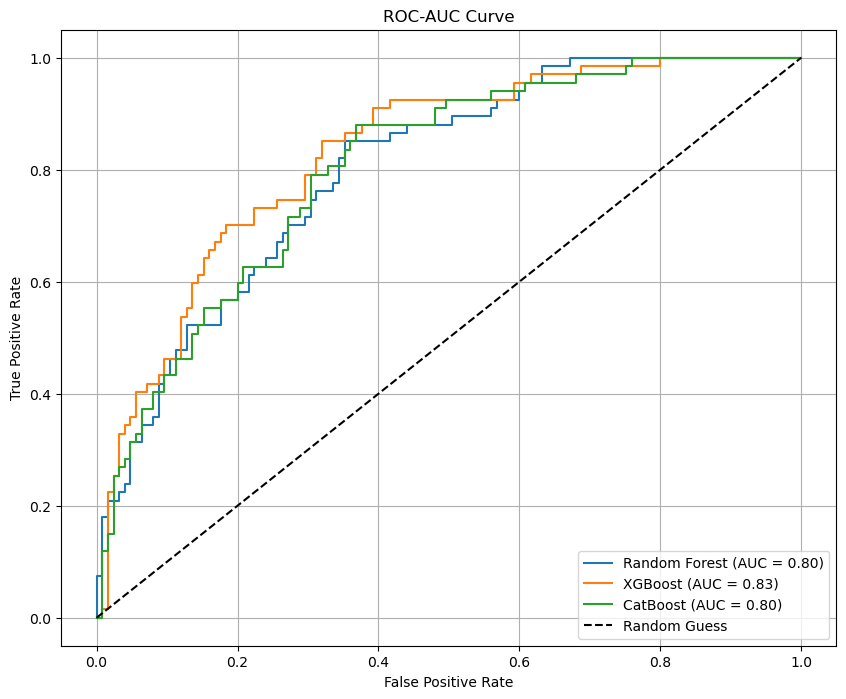

In [34]:
# Graficar la curva ROC para cada modelo
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Crear un pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Entrenar el pipeline
    pipeline.fit(X_train, y_train)
    
    # Obtener las probabilidades para el conjunto de prueba
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Agregar la línea diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Configuración del gráfico
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Entrenamiento y Evaluación de Modelos con las variables  categóricas

##### Selección de variables

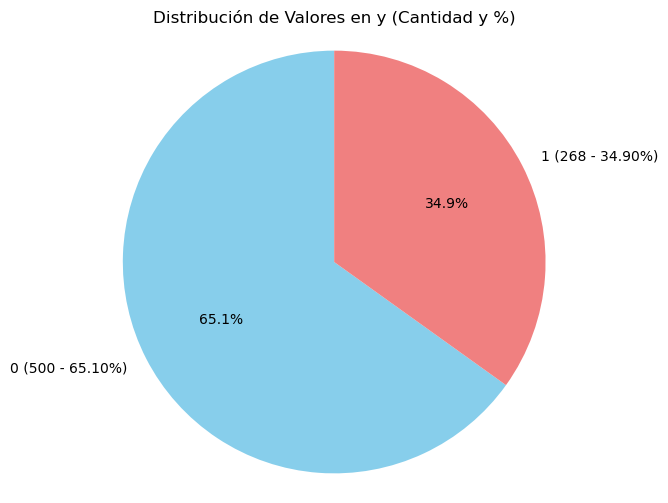

In [35]:
#X = df[[col for col in df.columns if not col.endswith('_cat') and col != 'Outcome']]
categorical_columns = ['bmi_cat', 'glucosa_cat', 'pregnancies_cat','Age','DiabetesPedigreeFunction']
X =df[categorical_columns]
y = df['Outcome']

# Calcular las proporciones y cantidades
value_counts = y.value_counts()
percentages = value_counts / value_counts.sum() * 100

# Crear etiquetas con cantidad y porcentaje
labels = [f"{idx} ({count} - {pct:.2f}%)" for idx, count, pct in zip(value_counts.index, value_counts, percentages)]

# Graficar la torta
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Valores en y (Cantidad y %)')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.show()

##### Con label encoder

Model Evaluation Results:
           Model  Train Recall  Test Recall  Train AUC  Test AUC  \
0  Random Forest      0.333902     0.268657   0.793829  0.783701   
1        XGBoost      0.532317     0.507463   0.780280  0.784896   
2       CatBoost      0.557561     0.492537   0.775111  0.735343   

   Train Accuracy  Test Accuracy  Train F1-Score  Test F1-Score  
0        0.744858       0.708333        0.462734       0.391304  
1        0.746507       0.750000        0.592504       0.586207  
2        0.720495       0.661458        0.578439       0.503817  


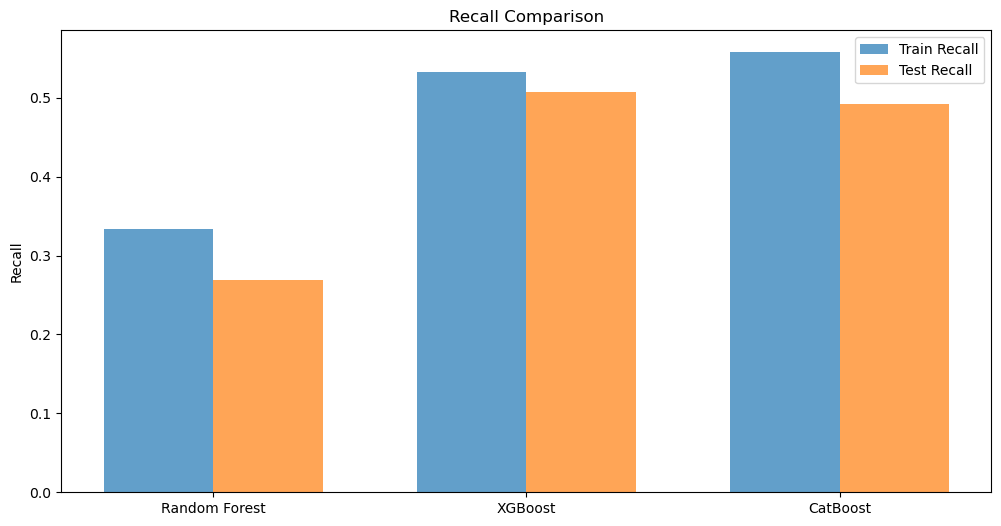

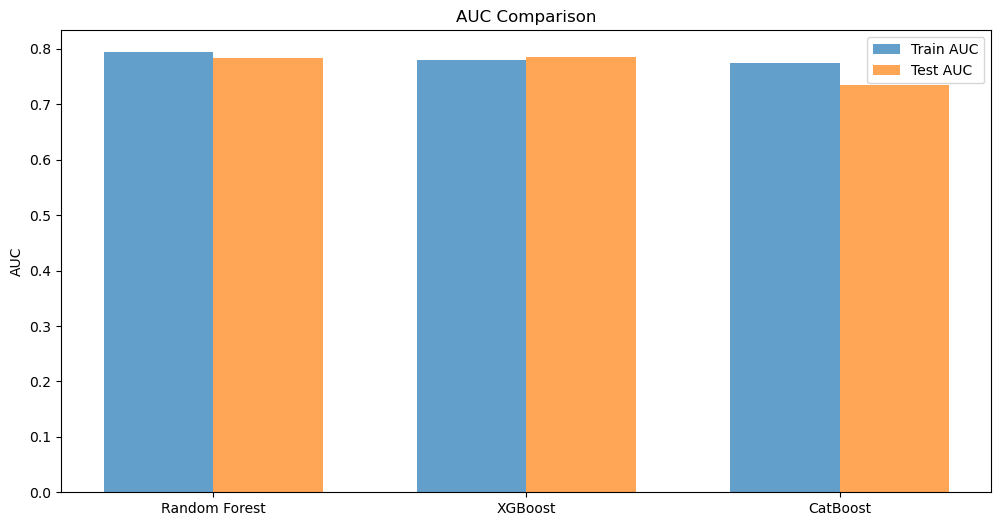

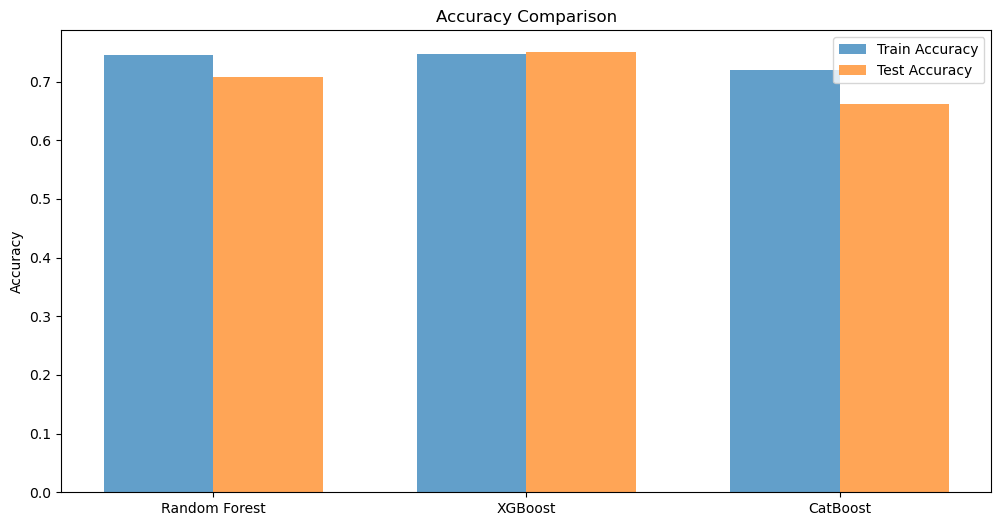

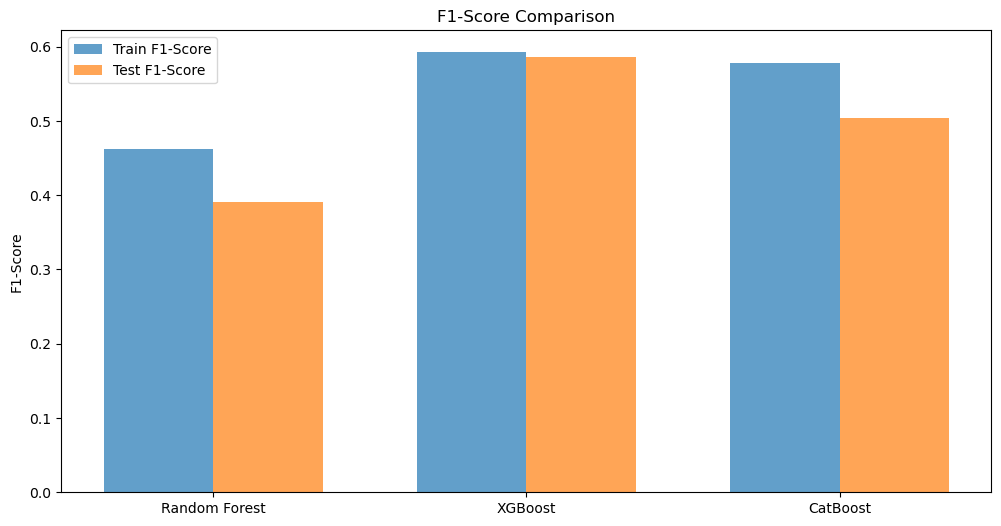

In [36]:
from sklearn.preprocessing import OrdinalEncoder
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Definir las columnas para imputación y codificación
categorical_cols = [col for col in X.columns if X[col].dtype == 'object' or X[col].dtype.name == 'category']
median_impute_cols = ['DiabetesPedigreeFunction','Age']

# Crear transformaciones para imputación y codificación
categorical_encoder = ('categorical_encoder', OrdinalEncoder(), categorical_cols)
# Crear transformaciones para imputación
median_imputer = ('median_imputer', SimpleImputer(strategy='median'), median_impute_cols)

# Crear un ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        median_imputer,
        categorical_encoder
    ],
    remainder='passthrough'  # Mantener el resto de las columnas sin cambios
)

# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300, max_depth=2, min_samples_leaf=3, min_samples_split=3),
    "XGBoost": XGBClassifier(learning_rate=0.1, eval_metric='logloss', random_state=42, n_estimators=300, max_depth=2),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42, learning_rate=0.1)
}

# Inicializar el KFold para validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar un diccionario para almacenar las métricas
results = {
    "Model": [],
    "Train Recall": [],
    "Test Recall": [],
    "Train AUC": [],
    "Test AUC": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Train F1-Score": [],
    "Test F1-Score": []
}

# Entrenar los modelos con validación cruzada
for name, model in models.items():
    # Crear un pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Validación cruzada en el conjunto de entrenamiento
    train_recall = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
    train_aucs = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
    train_accuracy = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    train_f1 = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

    # Entrenar en el conjunto de entrenamiento completo
    pipeline.fit(X_train, y_train)

    # Evaluar en el conjunto de prueba
    y_test_pred = pipeline.predict(X_test)
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]
    test_recall = recall_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Guardar los resultados
    results["Model"].append(name)
    results["Train Recall"].append(np.mean(train_recall))
    results["Test Recall"].append(test_recall)
    results["Train AUC"].append(np.mean(train_aucs))
    results["Test AUC"].append(test_auc)
    results["Train Accuracy"].append(np.mean(train_accuracy))
    results["Test Accuracy"].append(test_accuracy)
    results["Train F1-Score"].append(np.mean(train_f1))
    results["Test F1-Score"].append(test_f1)

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados
print("Model Evaluation Results:")
print(results_df)

# Graficar las métricas
metrics_to_plot = ["Recall", "AUC", "Accuracy", "F1-Score"]
x = np.arange(len(results["Model"]))
width = 0.35

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    plt.bar(x - width / 2, results_df[f"Train {metric}"], width, label=f'Train {metric}', alpha=0.7)
    plt.bar(x + width / 2, results_df[f"Test {metric}"], width, label=f'Test {metric}', alpha=0.7)
    plt.xticks(x, results["Model"])
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.legend()
    plt.show()

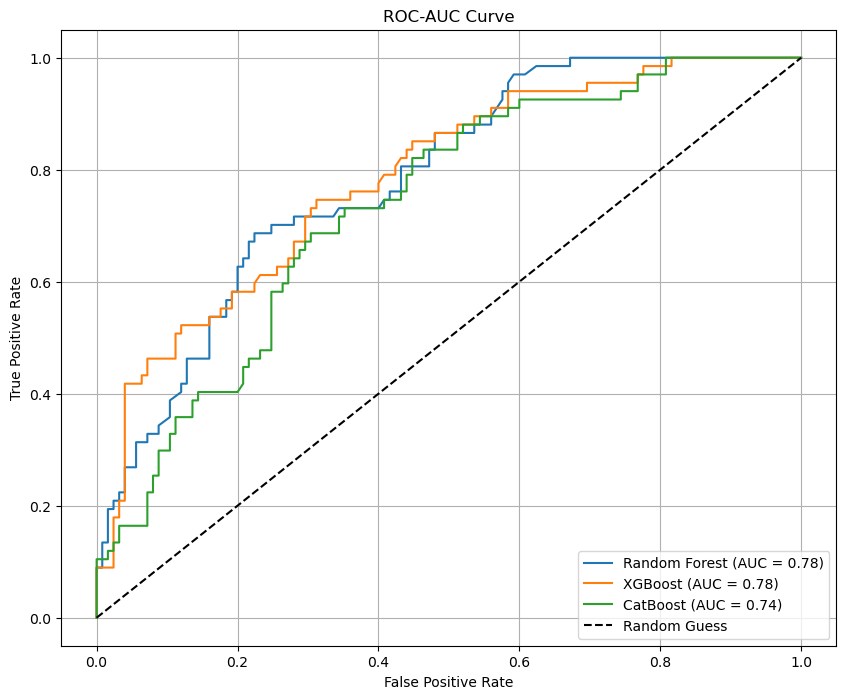

In [37]:
# Graficar la curva ROC para cada modelo
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Crear un pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Entrenar el pipeline
    pipeline.fit(X_train, y_train)
    
    # Obtener las probabilidades para el conjunto de prueba
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Agregar la línea diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Configuración del gráfico
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


##### One hot encoder como encoder

Model Evaluation Results:
           Model  Train Recall  Test Recall  Train AUC  Test AUC  \
0  Random Forest      0.333902     0.268657   0.795454  0.793851   
1        XGBoost      0.547317     0.522388   0.782628  0.790925   
2       CatBoost      0.557317     0.552239   0.781155  0.752657   

   Train Accuracy  Test Accuracy  Train F1-Score  Test F1-Score  
0        0.746597       0.708333        0.464718       0.391304  
1        0.743088       0.734375        0.593766       0.578512  
2        0.723943       0.703125        0.580468       0.564885  


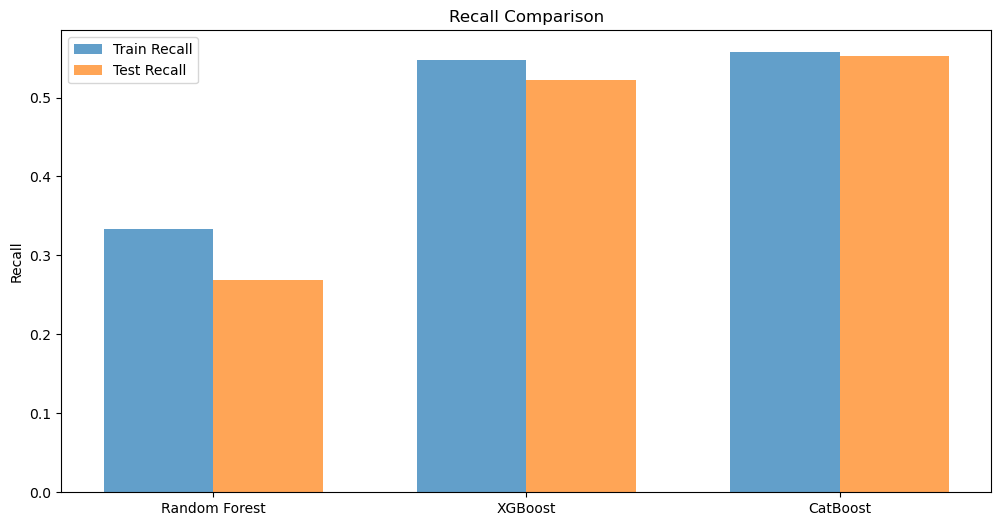

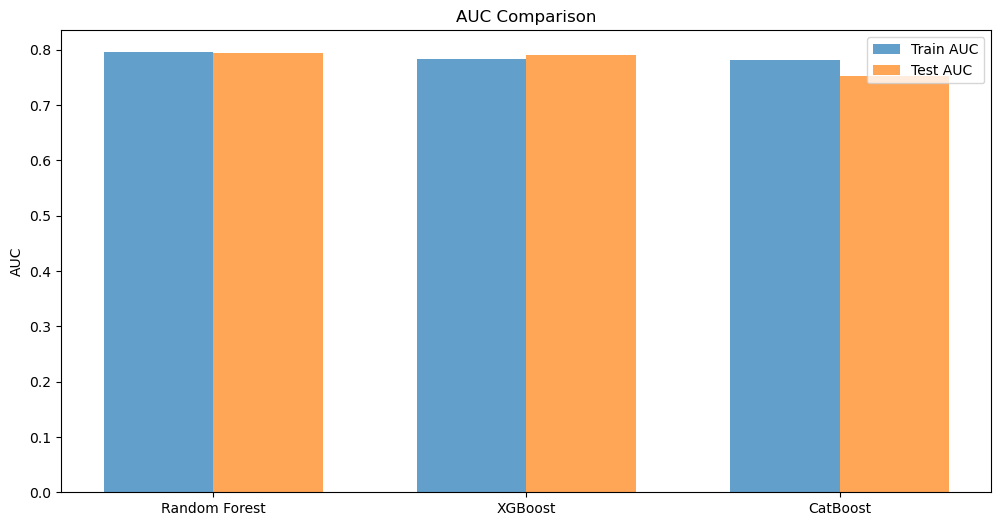

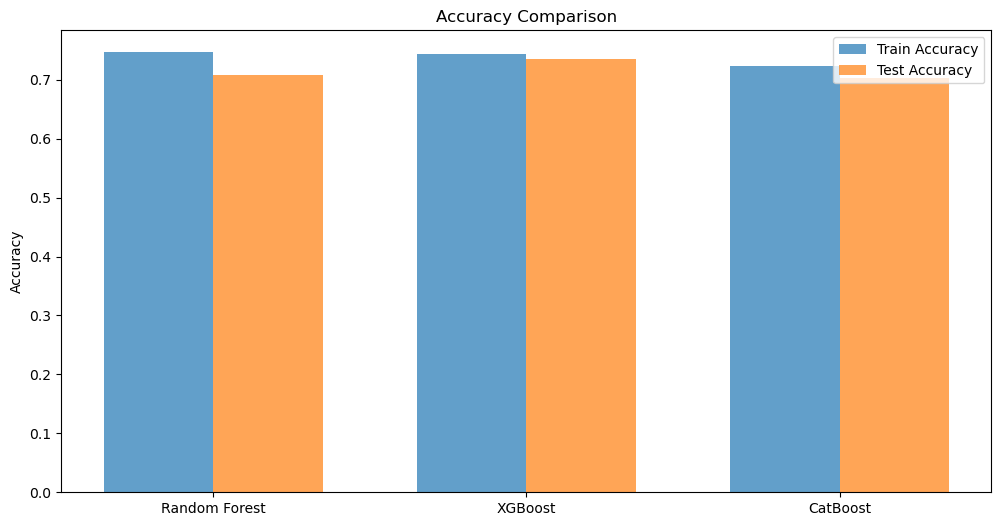

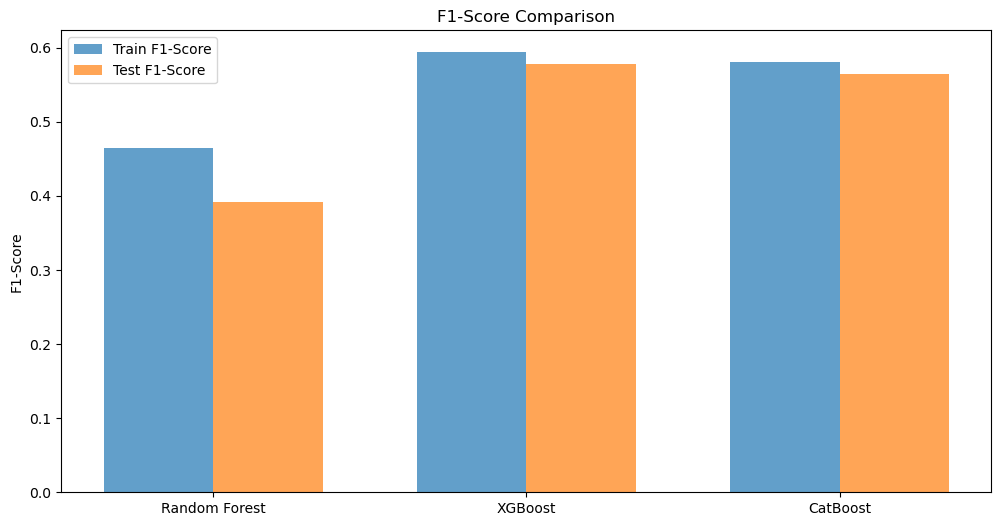

In [38]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Definir las columnas para imputación y codificación
categorical_cols = [col for col in X.columns if X[col].dtype == 'object' or X[col].dtype.name == 'category']
median_impute_cols = ['DiabetesPedigreeFunction','Age']

# Crear transformaciones para imputación y codificación
categorical_encoder = ('categorical_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
# Crear transformaciones para imputación
median_imputer = ('median_imputer', SimpleImputer(strategy='median'), median_impute_cols)

# Crear un ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        median_imputer,
        categorical_encoder
    ],
    remainder='passthrough'  # Mantener el resto de las columnas sin cambios
)

# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300, max_depth=2, min_samples_leaf=3, min_samples_split=3),
    "XGBoost": XGBClassifier(learning_rate=0.1, eval_metric='logloss', random_state=42, n_estimators=300, max_depth=2),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42, learning_rate=0.1)
}

# Inicializar el KFold para validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar un diccionario para almacenar las métricas
results = {
    "Model": [],
    "Train Recall": [],
    "Test Recall": [],
    "Train AUC": [],
    "Test AUC": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Train F1-Score": [],
    "Test F1-Score": []
}

# Entrenar los modelos con validación cruzada
for name, model in models.items():
    # Crear un pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Validación cruzada en el conjunto de entrenamiento
    train_recall = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
    train_aucs = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
    train_accuracy = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    train_f1 = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

    # Entrenar en el conjunto de entrenamiento completo
    pipeline.fit(X_train, y_train)

    # Evaluar en el conjunto de prueba
    y_test_pred = pipeline.predict(X_test)
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]
    test_recall = recall_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Guardar los resultados
    results["Model"].append(name)
    results["Train Recall"].append(np.mean(train_recall))
    results["Test Recall"].append(test_recall)
    results["Train AUC"].append(np.mean(train_aucs))
    results["Test AUC"].append(test_auc)
    results["Train Accuracy"].append(np.mean(train_accuracy))
    results["Test Accuracy"].append(test_accuracy)
    results["Train F1-Score"].append(np.mean(train_f1))
    results["Test F1-Score"].append(test_f1)

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados
print("Model Evaluation Results:")
print(results_df)

# Graficar las métricas
metrics_to_plot = ["Recall", "AUC", "Accuracy", "F1-Score"]
x = np.arange(len(results["Model"]))
width = 0.35

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    plt.bar(x - width / 2, results_df[f"Train {metric}"], width, label=f'Train {metric}', alpha=0.7)
    plt.bar(x + width / 2, results_df[f"Test {metric}"], width, label=f'Test {metric}', alpha=0.7)
    plt.xticks(x, results["Model"])
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.legend()
    plt.show()


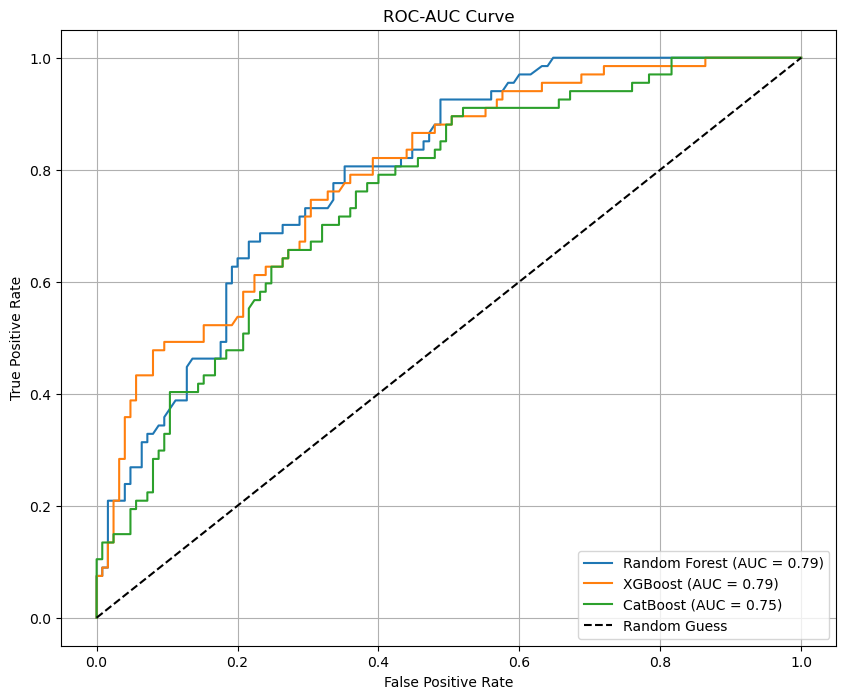

In [39]:
# Graficar la curva ROC para cada modelo
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Crear un pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Entrenar el pipeline
    pipeline.fit(X_train, y_train)
    
    # Obtener las probabilidades para el conjunto de prueba
    y_test_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Agregar la línea diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Configuración del gráfico
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Conclusión

* El modelo que gana tiene las siguientes características en su entrenamiento:
    * Solo usa las variables numéricas 'Glucose','Age','BMI','Pregnancies','DiabetesPedigreeFunction'
    * Se entrena con imputación en la media para Glucosa y BMI, en la mediana para el resto
    * Se mantienen los parámetros calculados en el entrenamiento (media y mediana por variable) para imputar en el test
* Las métricas que obtiene en el test son:
    * Recall : 64%
    * Accuracy : 78%
    * F1: 67%
    * AUC : 83%  